In [1]:
import pandas as pd
import numpy as np

#import sklearn 

#from numpy import mean
#from numpy import std

#from sklearn.preprocessing import StandardScaler

from catboost import CatBoostRegressor


#from sklearn.ensemble import StackingRegressor

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold

#from sklearn.metrics import make_scorer

from matplotlib import pyplot
import seaborn as sns

In [2]:
original = pd.read_csv('../Data/Original.csv')
original.shape

(2580, 82)

In [3]:
ames = pd.read_csv('../Data/Ames_HousePrice.csv')
ames.shape

(2580, 82)

In [4]:
ordinal = pd.read_csv('../Data/BaseOrdinal.csv')
ordinal.shape

(2580, 83)

In [5]:
original.equals(ames)

True

In [6]:
ames.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [7]:
categorical_features_indices = np.where(ames.dtypes == np.object)[0]
categorical_features_indices

array([ 5,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 24, 25, 26, 27,
       28, 30, 31, 32, 33, 34, 35, 36, 38, 42, 43, 44, 45, 55, 57, 59, 60,
       62, 65, 66, 67, 74, 75, 76, 80, 81])

In [8]:
scoring = {'r2': 'r2',
           'neg_mae': 'neg_mean_absolute_error'
          }

In [9]:
# Use cross-validation to evaluate model performance

def evaluate_model(model, X, y):
    
    # define the evaluation procedure
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    
    # evaluate the model and collect the results
    scores = cross_validate(model, X, y, scoring=scoring, 
                                  cv=cv, n_jobs=-1) 
    
    df = pd.DataFrame(scores)
    
    return df

In [10]:
X = ordinal.drop(['SalePrice'], axis=1).values
y = ordinal.SalePrice.values

In [11]:
dfs = evaluate_model(CatBoostRegressor(), X, y)

Learning rate set to 0.04591
0:	learn: 73195.4591348	total: 66.1ms	remaining: 1m 6s
1:	learn: 71035.2908142	total: 71.2ms	remaining: 35.5s
2:	learn: 69045.8595035	total: 74.8ms	remaining: 24.9s
3:	learn: 66979.0504194	total: 79.5ms	remaining: 19.8s
4:	learn: 65111.7308409	total: 85.6ms	remaining: 17s
5:	learn: 63361.5524666	total: 90.7ms	remaining: 15s
6:	learn: 61488.2377611	total: 95ms	remaining: 13.5s
7:	learn: 59691.0992851	total: 100ms	remaining: 12.4s
8:	learn: 58014.1168571	total: 105ms	remaining: 11.6s
9:	learn: 56405.8691245	total: 111ms	remaining: 11s
10:	learn: 54921.3203609	total: 115ms	remaining: 10.4s
11:	learn: 53428.1806545	total: 119ms	remaining: 9.83s
12:	learn: 52078.4312157	total: 125ms	remaining: 9.46s
13:	learn: 50707.7881880	total: 130ms	remaining: 9.18s
14:	learn: 49477.1721075	total: 137ms	remaining: 9s
15:	learn: 48238.9911997	total: 143ms	remaining: 8.79s
16:	learn: 47146.4425343	total: 147ms	remaining: 8.5s
17:	learn: 45909.6581842	total: 154ms	remaining: 8.

Learning rate set to 0.04591
0:	learn: 73437.4779504	total: 68.1ms	remaining: 1m 8s
1:	learn: 71345.5119957	total: 74ms	remaining: 36.9s
2:	learn: 69104.9737771	total: 78.4ms	remaining: 26s
3:	learn: 67032.4773860	total: 82ms	remaining: 20.4s
4:	learn: 64976.4536551	total: 88ms	remaining: 17.5s
5:	learn: 63123.4130128	total: 95.9ms	remaining: 15.9s
6:	learn: 61323.3298720	total: 100ms	remaining: 14.3s
7:	learn: 59601.8640668	total: 105ms	remaining: 13s
8:	learn: 58005.8228095	total: 116ms	remaining: 12.7s
9:	learn: 56238.1461455	total: 122ms	remaining: 12.1s
10:	learn: 54695.9816318	total: 127ms	remaining: 11.4s
11:	learn: 53313.0838415	total: 131ms	remaining: 10.8s
12:	learn: 51913.1060372	total: 142ms	remaining: 10.8s
13:	learn: 50534.0540288	total: 149ms	remaining: 10.5s
14:	learn: 49276.8212098	total: 154ms	remaining: 10.1s
15:	learn: 48034.5315007	total: 160ms	remaining: 9.82s
16:	learn: 46694.2485524	total: 165ms	remaining: 9.54s
17:	learn: 45710.3366079	total: 176ms	remaining: 9

148:	learn: 16627.9727619	total: 989ms	remaining: 5.65s
149:	learn: 16600.1217544	total: 993ms	remaining: 5.62s
150:	learn: 16563.4263267	total: 997ms	remaining: 5.6s
151:	learn: 16535.6003216	total: 1s	remaining: 5.59s
152:	learn: 16510.2601031	total: 1s	remaining: 5.57s
153:	learn: 16478.6585506	total: 1.01s	remaining: 5.57s
154:	learn: 16433.2320838	total: 1.02s	remaining: 5.57s
155:	learn: 16389.7828560	total: 1.03s	remaining: 5.57s
156:	learn: 16361.8320468	total: 1.03s	remaining: 5.55s
157:	learn: 16324.0576578	total: 1.04s	remaining: 5.53s
158:	learn: 16294.0009486	total: 1.05s	remaining: 5.55s
159:	learn: 16269.5724891	total: 1.05s	remaining: 5.54s
160:	learn: 16232.1973609	total: 1.06s	remaining: 5.52s
161:	learn: 16206.0175516	total: 1.07s	remaining: 5.53s
162:	learn: 16172.5289103	total: 1.08s	remaining: 5.53s
163:	learn: 16125.9951827	total: 1.08s	remaining: 5.53s
164:	learn: 16107.0595329	total: 1.09s	remaining: 5.51s
165:	learn: 16071.8460624	total: 1.09s	remaining: 5.49s

149:	learn: 16574.7611668	total: 1.07s	remaining: 6.05s
150:	learn: 16543.6800788	total: 1.08s	remaining: 6.05s
151:	learn: 16484.7910763	total: 1.08s	remaining: 6.03s
152:	learn: 16452.2555419	total: 1.09s	remaining: 6.02s
153:	learn: 16420.9848722	total: 1.09s	remaining: 6s
154:	learn: 16387.4575852	total: 1.09s	remaining: 5.97s
155:	learn: 16337.1993549	total: 1.1s	remaining: 5.98s
156:	learn: 16308.6258070	total: 1.11s	remaining: 5.96s
157:	learn: 16275.7773157	total: 1.12s	remaining: 5.95s
158:	learn: 16237.5130008	total: 1.12s	remaining: 5.93s
159:	learn: 16203.0423697	total: 1.13s	remaining: 5.91s
160:	learn: 16161.9556330	total: 1.13s	remaining: 5.88s
161:	learn: 16131.1530812	total: 1.14s	remaining: 5.88s
162:	learn: 16103.2119902	total: 1.14s	remaining: 5.87s
163:	learn: 16071.1353375	total: 1.15s	remaining: 5.85s
164:	learn: 16045.9116888	total: 1.16s	remaining: 5.86s
165:	learn: 16011.7976183	total: 1.16s	remaining: 5.84s
166:	learn: 15964.0413210	total: 1.17s	remaining: 5.

295:	learn: 12722.1517957	total: 1.89s	remaining: 4.49s
296:	learn: 12702.7502058	total: 1.9s	remaining: 4.49s
297:	learn: 12681.1758661	total: 1.91s	remaining: 4.49s
298:	learn: 12664.6171266	total: 1.91s	remaining: 4.48s
299:	learn: 12645.8805394	total: 1.92s	remaining: 4.48s
300:	learn: 12626.7167970	total: 1.93s	remaining: 4.47s
301:	learn: 12608.6543618	total: 1.94s	remaining: 4.48s
302:	learn: 12590.9356550	total: 1.95s	remaining: 4.47s
303:	learn: 12564.7704330	total: 1.95s	remaining: 4.47s
304:	learn: 12548.3577433	total: 1.96s	remaining: 4.46s
305:	learn: 12545.2750376	total: 1.96s	remaining: 4.45s
306:	learn: 12541.1992284	total: 1.97s	remaining: 4.45s
307:	learn: 12534.1648596	total: 1.98s	remaining: 4.44s
308:	learn: 12513.0848205	total: 1.98s	remaining: 4.43s
309:	learn: 12503.3965267	total: 1.98s	remaining: 4.41s
310:	learn: 12482.7166940	total: 1.99s	remaining: 4.4s
311:	learn: 12459.8413315	total: 2s	remaining: 4.4s
312:	learn: 12457.3005671	total: 2s	remaining: 4.39s
3

296:	learn: 12739.2205044	total: 1.95s	remaining: 4.63s
297:	learn: 12730.4443801	total: 1.96s	remaining: 4.63s
298:	learn: 12710.2343054	total: 1.97s	remaining: 4.61s
299:	learn: 12701.5957459	total: 1.97s	remaining: 4.6s
300:	learn: 12678.5158843	total: 1.98s	remaining: 4.59s
301:	learn: 12648.3283036	total: 1.99s	remaining: 4.59s
302:	learn: 12626.5566466	total: 1.99s	remaining: 4.58s
303:	learn: 12608.5481922	total: 2s	remaining: 4.58s
304:	learn: 12591.8234627	total: 2s	remaining: 4.57s
305:	learn: 12576.6571538	total: 2.01s	remaining: 4.55s
306:	learn: 12556.0456506	total: 2.01s	remaining: 4.54s
307:	learn: 12548.2336991	total: 2.02s	remaining: 4.54s
308:	learn: 12527.2786700	total: 2.03s	remaining: 4.54s
309:	learn: 12504.4244270	total: 2.04s	remaining: 4.53s
310:	learn: 12485.3874588	total: 2.04s	remaining: 4.53s
311:	learn: 12463.9182131	total: 2.06s	remaining: 4.53s
312:	learn: 12447.9180553	total: 2.06s	remaining: 4.53s
313:	learn: 12426.5978152	total: 2.07s	remaining: 4.52s

296:	learn: 12858.6902246	total: 2.03s	remaining: 4.82s
297:	learn: 12835.0395559	total: 2.04s	remaining: 4.82s
298:	learn: 12799.1212458	total: 2.05s	remaining: 4.82s
299:	learn: 12774.1996484	total: 2.06s	remaining: 4.82s
300:	learn: 12760.9014137	total: 2.08s	remaining: 4.82s
301:	learn: 12743.3564251	total: 2.08s	remaining: 4.82s
302:	learn: 12728.0398219	total: 2.1s	remaining: 4.83s
303:	learn: 12708.8541567	total: 2.1s	remaining: 4.82s
304:	learn: 12689.4017907	total: 2.11s	remaining: 4.8s
305:	learn: 12679.0488269	total: 2.11s	remaining: 4.79s
306:	learn: 12661.9597427	total: 2.12s	remaining: 4.78s
307:	learn: 12631.3309896	total: 2.13s	remaining: 4.78s
308:	learn: 12602.0322039	total: 2.14s	remaining: 4.79s
309:	learn: 12595.0570401	total: 2.16s	remaining: 4.81s
310:	learn: 12575.5808803	total: 2.17s	remaining: 4.8s
311:	learn: 12562.6940366	total: 2.18s	remaining: 4.82s
312:	learn: 12541.1075743	total: 2.19s	remaining: 4.81s
313:	learn: 12520.7924046	total: 2.2s	remaining: 4.8

442:	learn: 10657.7220480	total: 2.86s	remaining: 3.59s
443:	learn: 10646.2562869	total: 2.86s	remaining: 3.58s
444:	learn: 10645.5314550	total: 2.87s	remaining: 3.58s
445:	learn: 10637.6214182	total: 2.88s	remaining: 3.57s
446:	learn: 10636.9139262	total: 2.88s	remaining: 3.56s
447:	learn: 10625.8586683	total: 2.88s	remaining: 3.55s
448:	learn: 10608.2233860	total: 2.89s	remaining: 3.54s
449:	learn: 10597.0622444	total: 2.89s	remaining: 3.53s
450:	learn: 10590.3218400	total: 2.9s	remaining: 3.53s
451:	learn: 10578.2615721	total: 2.91s	remaining: 3.53s
452:	learn: 10574.6728185	total: 2.92s	remaining: 3.52s
453:	learn: 10570.6015011	total: 2.93s	remaining: 3.52s
454:	learn: 10557.8431394	total: 2.94s	remaining: 3.52s
455:	learn: 10543.1065157	total: 2.95s	remaining: 3.51s
456:	learn: 10524.3762443	total: 2.96s	remaining: 3.52s
457:	learn: 10518.1539071	total: 2.97s	remaining: 3.51s
458:	learn: 10504.2813020	total: 2.98s	remaining: 3.51s
459:	learn: 10499.3793260	total: 2.99s	remaining:

443:	learn: 10436.2380210	total: 3.09s	remaining: 3.87s
444:	learn: 10414.6857244	total: 3.1s	remaining: 3.86s
445:	learn: 10397.2740185	total: 3.12s	remaining: 3.88s
446:	learn: 10388.7288178	total: 3.13s	remaining: 3.87s
447:	learn: 10372.5327131	total: 3.14s	remaining: 3.87s
448:	learn: 10354.0473354	total: 3.15s	remaining: 3.87s
449:	learn: 10348.2306919	total: 3.16s	remaining: 3.86s
450:	learn: 10331.9574362	total: 3.17s	remaining: 3.86s
451:	learn: 10316.9320380	total: 3.19s	remaining: 3.87s
452:	learn: 10302.2393304	total: 3.2s	remaining: 3.86s
453:	learn: 10292.8416537	total: 3.21s	remaining: 3.86s
454:	learn: 10276.9131303	total: 3.22s	remaining: 3.86s
455:	learn: 10262.2940308	total: 3.23s	remaining: 3.85s
456:	learn: 10259.5987248	total: 3.24s	remaining: 3.85s
457:	learn: 10247.2103301	total: 3.24s	remaining: 3.84s
458:	learn: 10230.3351424	total: 3.25s	remaining: 3.83s
459:	learn: 10224.7859185	total: 3.26s	remaining: 3.82s
460:	learn: 10207.3826349	total: 3.26s	remaining: 

444:	learn: 10566.1467832	total: 3.17s	remaining: 3.96s
445:	learn: 10550.0071994	total: 3.19s	remaining: 3.96s
446:	learn: 10538.3309195	total: 3.2s	remaining: 3.96s
447:	learn: 10537.4878753	total: 3.21s	remaining: 3.95s
448:	learn: 10522.6197213	total: 3.21s	remaining: 3.94s
449:	learn: 10503.7445456	total: 3.23s	remaining: 3.94s
450:	learn: 10482.6323463	total: 3.23s	remaining: 3.94s
451:	learn: 10466.4108057	total: 3.24s	remaining: 3.93s
452:	learn: 10448.1675306	total: 3.25s	remaining: 3.92s
453:	learn: 10445.5036047	total: 3.25s	remaining: 3.92s
454:	learn: 10443.1893604	total: 3.26s	remaining: 3.91s
455:	learn: 10432.6729102	total: 3.27s	remaining: 3.9s
456:	learn: 10420.6678959	total: 3.27s	remaining: 3.89s
457:	learn: 10401.4567920	total: 3.28s	remaining: 3.88s
458:	learn: 10389.2703639	total: 3.29s	remaining: 3.88s
459:	learn: 10373.3625305	total: 3.3s	remaining: 3.88s
460:	learn: 10370.2064626	total: 3.31s	remaining: 3.88s
461:	learn: 10349.1515769	total: 3.33s	remaining: 3

594:	learn: 8684.7277600	total: 4.17s	remaining: 2.83s
595:	learn: 8667.8914426	total: 4.17s	remaining: 2.83s
596:	learn: 8665.6463571	total: 4.18s	remaining: 2.82s
597:	learn: 8654.1489735	total: 4.19s	remaining: 2.81s
598:	learn: 8644.2605521	total: 4.19s	remaining: 2.81s
599:	learn: 8633.5942859	total: 4.2s	remaining: 2.8s
600:	learn: 8632.0036822	total: 4.2s	remaining: 2.79s
601:	learn: 8621.7761154	total: 4.21s	remaining: 2.78s
602:	learn: 8609.2106756	total: 4.22s	remaining: 2.77s
603:	learn: 8601.2655583	total: 4.22s	remaining: 2.77s
604:	learn: 8591.3026120	total: 4.24s	remaining: 2.77s
605:	learn: 8585.2063766	total: 4.25s	remaining: 2.76s
606:	learn: 8573.5070482	total: 4.26s	remaining: 2.76s
607:	learn: 8561.5533972	total: 4.28s	remaining: 2.76s
608:	learn: 8550.2549807	total: 4.29s	remaining: 2.75s
609:	learn: 8542.3272000	total: 4.3s	remaining: 2.75s
610:	learn: 8533.8494295	total: 4.3s	remaining: 2.74s
611:	learn: 8519.4668948	total: 4.31s	remaining: 2.73s
612:	learn: 851

593:	learn: 8516.0079420	total: 4.19s	remaining: 2.86s
594:	learn: 8496.1875919	total: 4.2s	remaining: 2.86s
595:	learn: 8484.7912530	total: 4.21s	remaining: 2.85s
596:	learn: 8471.3565216	total: 4.21s	remaining: 2.84s
597:	learn: 8460.0712661	total: 4.23s	remaining: 2.84s
598:	learn: 8449.2674864	total: 4.26s	remaining: 2.85s
599:	learn: 8436.6899398	total: 4.28s	remaining: 2.85s
600:	learn: 8428.7253108	total: 4.28s	remaining: 2.84s
601:	learn: 8424.7824406	total: 4.29s	remaining: 2.84s
602:	learn: 8415.8339879	total: 4.3s	remaining: 2.83s
603:	learn: 8403.2445841	total: 4.3s	remaining: 2.82s
604:	learn: 8395.3527919	total: 4.31s	remaining: 2.82s
605:	learn: 8384.0809648	total: 4.32s	remaining: 2.81s
606:	learn: 8375.4028434	total: 4.33s	remaining: 2.8s
607:	learn: 8364.7366163	total: 4.34s	remaining: 2.8s
608:	learn: 8352.8186902	total: 4.35s	remaining: 2.79s
609:	learn: 8342.4266636	total: 4.36s	remaining: 2.79s
610:	learn: 8334.9418376	total: 4.36s	remaining: 2.78s
611:	learn: 832

744:	learn: 7417.6429212	total: 5.36s	remaining: 1.83s
745:	learn: 7408.9887363	total: 5.36s	remaining: 1.82s
746:	learn: 7403.0405855	total: 5.37s	remaining: 1.82s
747:	learn: 7396.6065234	total: 5.37s	remaining: 1.81s
748:	learn: 7390.0909816	total: 5.37s	remaining: 1.8s
749:	learn: 7380.1842236	total: 5.38s	remaining: 1.79s
750:	learn: 7374.8736503	total: 5.38s	remaining: 1.78s
751:	learn: 7365.9522780	total: 5.39s	remaining: 1.78s
752:	learn: 7356.5222406	total: 5.39s	remaining: 1.77s
753:	learn: 7355.4806767	total: 5.39s	remaining: 1.76s
754:	learn: 7352.9443088	total: 5.4s	remaining: 1.75s
755:	learn: 7346.6622403	total: 5.4s	remaining: 1.74s
756:	learn: 7345.2895774	total: 5.41s	remaining: 1.74s
757:	learn: 7338.8683170	total: 5.41s	remaining: 1.73s
758:	learn: 7329.0624624	total: 5.42s	remaining: 1.72s
759:	learn: 7322.4918545	total: 5.42s	remaining: 1.71s
760:	learn: 7318.9877576	total: 5.43s	remaining: 1.7s
761:	learn: 7308.3907750	total: 5.43s	remaining: 1.7s
762:	learn: 729

743:	learn: 7219.9194796	total: 5.6s	remaining: 1.93s
744:	learn: 7207.6323624	total: 5.63s	remaining: 1.93s
745:	learn: 7199.9805579	total: 5.64s	remaining: 1.92s
746:	learn: 7190.9063256	total: 5.66s	remaining: 1.92s
747:	learn: 7183.8201662	total: 5.67s	remaining: 1.91s
748:	learn: 7174.2517908	total: 5.7s	remaining: 1.91s
749:	learn: 7165.0788346	total: 5.73s	remaining: 1.91s
750:	learn: 7158.4301475	total: 5.75s	remaining: 1.91s
751:	learn: 7152.3425396	total: 5.77s	remaining: 1.9s
752:	learn: 7144.0903943	total: 5.78s	remaining: 1.9s
753:	learn: 7136.4185363	total: 5.79s	remaining: 1.89s
754:	learn: 7127.9101532	total: 5.8s	remaining: 1.88s
755:	learn: 7121.1929602	total: 5.81s	remaining: 1.87s
756:	learn: 7113.1039745	total: 5.82s	remaining: 1.87s
757:	learn: 7103.8702423	total: 5.83s	remaining: 1.86s
758:	learn: 7094.5374598	total: 5.83s	remaining: 1.85s
759:	learn: 7087.6607046	total: 5.84s	remaining: 1.84s
760:	learn: 7080.6443674	total: 5.85s	remaining: 1.84s
761:	learn: 707

894:	learn: 6436.6351691	total: 6.34s	remaining: 744ms
895:	learn: 6427.2243565	total: 6.35s	remaining: 737ms
896:	learn: 6417.5670087	total: 6.36s	remaining: 730ms
897:	learn: 6407.4839143	total: 6.36s	remaining: 723ms
898:	learn: 6402.7451359	total: 6.37s	remaining: 716ms
899:	learn: 6399.1990727	total: 6.38s	remaining: 708ms
900:	learn: 6392.3695968	total: 6.38s	remaining: 701ms
901:	learn: 6384.6045369	total: 6.4s	remaining: 695ms
902:	learn: 6376.7114217	total: 6.41s	remaining: 688ms
903:	learn: 6367.6915544	total: 6.41s	remaining: 681ms
904:	learn: 6362.5493356	total: 6.42s	remaining: 674ms
905:	learn: 6354.4046813	total: 6.43s	remaining: 667ms
906:	learn: 6348.8665499	total: 6.44s	remaining: 660ms
907:	learn: 6343.7677709	total: 6.45s	remaining: 653ms
908:	learn: 6335.5575283	total: 6.46s	remaining: 647ms
909:	learn: 6328.5766471	total: 6.47s	remaining: 640ms
910:	learn: 6318.8615676	total: 6.48s	remaining: 633ms
911:	learn: 6312.1721452	total: 6.48s	remaining: 625ms
912:	learn:

892:	learn: 6478.0565659	total: 6.37s	remaining: 763ms
893:	learn: 6471.2966011	total: 6.38s	remaining: 756ms
894:	learn: 6464.9703077	total: 6.39s	remaining: 749ms
895:	learn: 6457.1122737	total: 6.39s	remaining: 742ms
896:	learn: 6452.3156930	total: 6.4s	remaining: 735ms
897:	learn: 6443.0454134	total: 6.41s	remaining: 728ms
898:	learn: 6437.6905605	total: 6.41s	remaining: 720ms
899:	learn: 6429.7344039	total: 6.43s	remaining: 714ms
900:	learn: 6424.9193214	total: 6.44s	remaining: 707ms
901:	learn: 6416.6217803	total: 6.44s	remaining: 700ms
902:	learn: 6415.9952034	total: 6.45s	remaining: 693ms
903:	learn: 6410.6623194	total: 6.46s	remaining: 686ms
904:	learn: 6403.7985795	total: 6.47s	remaining: 679ms
905:	learn: 6402.4525538	total: 6.47s	remaining: 672ms
906:	learn: 6396.9337667	total: 6.48s	remaining: 665ms
907:	learn: 6390.1194010	total: 6.49s	remaining: 658ms
908:	learn: 6385.9000025	total: 6.5s	remaining: 651ms
909:	learn: 6385.6179489	total: 6.5s	remaining: 643ms
910:	learn: 6

893:	learn: 6211.4060178	total: 6.99s	remaining: 829ms
894:	learn: 6209.3778764	total: 7s	remaining: 821ms
895:	learn: 6201.1176445	total: 7.01s	remaining: 813ms
896:	learn: 6194.3303777	total: 7.01s	remaining: 806ms
897:	learn: 6187.8808737	total: 7.02s	remaining: 798ms
898:	learn: 6186.5562816	total: 7.03s	remaining: 790ms
899:	learn: 6180.4096043	total: 7.03s	remaining: 781ms
900:	learn: 6169.8340594	total: 7.04s	remaining: 773ms
901:	learn: 6164.0397088	total: 7.04s	remaining: 765ms
902:	learn: 6158.1346870	total: 7.05s	remaining: 758ms
903:	learn: 6153.6709377	total: 7.06s	remaining: 750ms
904:	learn: 6148.2319373	total: 7.07s	remaining: 742ms
905:	learn: 6141.3826434	total: 7.07s	remaining: 734ms
906:	learn: 6136.1395037	total: 7.08s	remaining: 726ms
907:	learn: 6132.0265613	total: 7.08s	remaining: 718ms
908:	learn: 6127.6718553	total: 7.09s	remaining: 709ms
909:	learn: 6118.3516654	total: 7.1s	remaining: 702ms
910:	learn: 6109.3326374	total: 7.12s	remaining: 695ms
911:	learn: 61

43:	learn: 29046.4153399	total: 322ms	remaining: 6.99s
44:	learn: 28635.7263717	total: 327ms	remaining: 6.94s
45:	learn: 28280.6521874	total: 338ms	remaining: 7.01s
46:	learn: 27948.1009006	total: 343ms	remaining: 6.95s
47:	learn: 27655.2744278	total: 353ms	remaining: 7s
48:	learn: 27326.6558459	total: 358ms	remaining: 6.94s
49:	learn: 27007.2891913	total: 363ms	remaining: 6.9s
50:	learn: 26718.5615507	total: 368ms	remaining: 6.86s
51:	learn: 26466.8069318	total: 376ms	remaining: 6.85s
52:	learn: 26187.2567146	total: 380ms	remaining: 6.79s
53:	learn: 25914.2465037	total: 386ms	remaining: 6.77s
54:	learn: 25679.2543551	total: 396ms	remaining: 6.8s
55:	learn: 25431.8946395	total: 401ms	remaining: 6.76s
56:	learn: 25176.9821187	total: 405ms	remaining: 6.7s
57:	learn: 24934.7638830	total: 413ms	remaining: 6.71s
58:	learn: 24737.2492688	total: 418ms	remaining: 6.66s
59:	learn: 24495.8917591	total: 424ms	remaining: 6.65s
60:	learn: 24319.2815388	total: 431ms	remaining: 6.64s
61:	learn: 24134

42:	learn: 28515.1007894	total: 279ms	remaining: 6.21s
43:	learn: 28160.5371087	total: 285ms	remaining: 6.19s
44:	learn: 27791.1268389	total: 297ms	remaining: 6.3s
45:	learn: 27477.4261437	total: 304ms	remaining: 6.3s
46:	learn: 27164.9852032	total: 309ms	remaining: 6.27s
47:	learn: 26839.2241045	total: 313ms	remaining: 6.22s
48:	learn: 26570.7616716	total: 318ms	remaining: 6.17s
49:	learn: 26269.1882255	total: 325ms	remaining: 6.18s
50:	learn: 26008.1209159	total: 335ms	remaining: 6.24s
51:	learn: 25745.3222427	total: 346ms	remaining: 6.31s
52:	learn: 25489.2543879	total: 352ms	remaining: 6.29s
53:	learn: 25241.9542016	total: 359ms	remaining: 6.29s
54:	learn: 24988.4853728	total: 364ms	remaining: 6.26s
55:	learn: 24731.1252025	total: 371ms	remaining: 6.25s
56:	learn: 24500.2207357	total: 377ms	remaining: 6.23s
57:	learn: 24298.9404684	total: 383ms	remaining: 6.22s
58:	learn: 24089.9040364	total: 394ms	remaining: 6.29s
59:	learn: 23845.7577491	total: 401ms	remaining: 6.28s
60:	learn: 2

191:	learn: 15193.0651327	total: 1.27s	remaining: 5.34s
192:	learn: 15172.9663440	total: 1.27s	remaining: 5.33s
193:	learn: 15152.0005163	total: 1.28s	remaining: 5.32s
194:	learn: 15121.2999214	total: 1.28s	remaining: 5.31s
195:	learn: 15094.4613551	total: 1.29s	remaining: 5.3s
196:	learn: 15062.5434026	total: 1.3s	remaining: 5.31s
197:	learn: 15017.5030519	total: 1.31s	remaining: 5.31s
198:	learn: 14972.4812997	total: 1.31s	remaining: 5.3s
199:	learn: 14937.2479319	total: 1.32s	remaining: 5.28s
200:	learn: 14910.8336429	total: 1.32s	remaining: 5.27s
201:	learn: 14886.1749927	total: 1.34s	remaining: 5.29s
202:	learn: 14847.4022189	total: 1.34s	remaining: 5.28s
203:	learn: 14832.5494166	total: 1.35s	remaining: 5.26s
204:	learn: 14795.3976879	total: 1.36s	remaining: 5.29s
205:	learn: 14778.0292075	total: 1.37s	remaining: 5.29s
206:	learn: 14739.3316315	total: 1.38s	remaining: 5.28s
207:	learn: 14707.3882598	total: 1.39s	remaining: 5.27s
208:	learn: 14684.6741031	total: 1.39s	remaining: 5

190:	learn: 14933.6499773	total: 1.27s	remaining: 5.38s
191:	learn: 14888.6018433	total: 1.28s	remaining: 5.38s
192:	learn: 14850.4814205	total: 1.29s	remaining: 5.39s
193:	learn: 14802.8691320	total: 1.29s	remaining: 5.38s
194:	learn: 14785.0250893	total: 1.3s	remaining: 5.37s
195:	learn: 14758.2405151	total: 1.31s	remaining: 5.38s
196:	learn: 14738.9865564	total: 1.31s	remaining: 5.36s
197:	learn: 14708.7003346	total: 1.32s	remaining: 5.35s
198:	learn: 14682.2575384	total: 1.32s	remaining: 5.33s
199:	learn: 14647.1647496	total: 1.33s	remaining: 5.32s
200:	learn: 14613.0175360	total: 1.34s	remaining: 5.31s
201:	learn: 14583.4423039	total: 1.34s	remaining: 5.3s
202:	learn: 14561.1011832	total: 1.35s	remaining: 5.29s
203:	learn: 14522.2460715	total: 1.35s	remaining: 5.28s
204:	learn: 14499.2747199	total: 1.36s	remaining: 5.27s
205:	learn: 14474.0835423	total: 1.37s	remaining: 5.27s
206:	learn: 14443.5647104	total: 1.37s	remaining: 5.25s
207:	learn: 14411.1869361	total: 1.38s	remaining: 

338:	learn: 11671.6218749	total: 2.21s	remaining: 4.31s
339:	learn: 11658.8161208	total: 2.21s	remaining: 4.3s
340:	learn: 11641.6216448	total: 2.22s	remaining: 4.29s
341:	learn: 11618.6263534	total: 2.22s	remaining: 4.28s
342:	learn: 11602.6151704	total: 2.23s	remaining: 4.27s
343:	learn: 11578.6257472	total: 2.24s	remaining: 4.26s
344:	learn: 11557.1988561	total: 2.24s	remaining: 4.26s
345:	learn: 11534.0709504	total: 2.25s	remaining: 4.25s
346:	learn: 11510.7441318	total: 2.25s	remaining: 4.24s
347:	learn: 11496.1378954	total: 2.26s	remaining: 4.23s
348:	learn: 11478.2758808	total: 2.27s	remaining: 4.23s
349:	learn: 11458.8828101	total: 2.27s	remaining: 4.22s
350:	learn: 11446.7501222	total: 2.28s	remaining: 4.21s
351:	learn: 11429.5582960	total: 2.29s	remaining: 4.21s
352:	learn: 11409.5635041	total: 2.29s	remaining: 4.2s
353:	learn: 11387.9042564	total: 2.3s	remaining: 4.2s
354:	learn: 11380.0059277	total: 2.3s	remaining: 4.19s
355:	learn: 11361.9132477	total: 2.31s	remaining: 4.1

337:	learn: 11725.6368157	total: 2.17s	remaining: 4.26s
338:	learn: 11710.8031095	total: 2.18s	remaining: 4.25s
339:	learn: 11687.3445031	total: 2.18s	remaining: 4.24s
340:	learn: 11672.3184778	total: 2.19s	remaining: 4.23s
341:	learn: 11649.5885349	total: 2.19s	remaining: 4.22s
342:	learn: 11636.3243845	total: 2.2s	remaining: 4.21s
343:	learn: 11626.2720605	total: 2.21s	remaining: 4.21s
344:	learn: 11613.7664294	total: 2.22s	remaining: 4.21s
345:	learn: 11595.4637173	total: 2.22s	remaining: 4.2s
346:	learn: 11572.8369090	total: 2.23s	remaining: 4.19s
347:	learn: 11554.3922509	total: 2.23s	remaining: 4.18s
348:	learn: 11538.6289792	total: 2.24s	remaining: 4.18s
349:	learn: 11523.5328841	total: 2.24s	remaining: 4.17s
350:	learn: 11515.3678813	total: 2.25s	remaining: 4.16s
351:	learn: 11490.1090936	total: 2.26s	remaining: 4.16s
352:	learn: 11479.0872490	total: 2.27s	remaining: 4.15s
353:	learn: 11462.2701295	total: 2.27s	remaining: 4.14s
354:	learn: 11440.4365084	total: 2.28s	remaining: 

483:	learn: 9438.9088543	total: 3.16s	remaining: 3.37s
484:	learn: 9424.4177982	total: 3.17s	remaining: 3.36s
485:	learn: 9406.2248241	total: 3.17s	remaining: 3.36s
486:	learn: 9396.5508505	total: 3.18s	remaining: 3.35s
487:	learn: 9384.0621258	total: 3.19s	remaining: 3.35s
488:	learn: 9371.9508814	total: 3.19s	remaining: 3.34s
489:	learn: 9364.8626593	total: 3.2s	remaining: 3.33s
490:	learn: 9347.4990214	total: 3.21s	remaining: 3.32s
491:	learn: 9337.4425258	total: 3.21s	remaining: 3.31s
492:	learn: 9326.3567434	total: 3.21s	remaining: 3.31s
493:	learn: 9311.6916347	total: 3.22s	remaining: 3.3s
494:	learn: 9302.7769770	total: 3.23s	remaining: 3.29s
495:	learn: 9286.3409885	total: 3.24s	remaining: 3.29s
496:	learn: 9276.7489734	total: 3.24s	remaining: 3.28s
497:	learn: 9262.4501750	total: 3.25s	remaining: 3.27s
498:	learn: 9254.9574942	total: 3.26s	remaining: 3.27s
499:	learn: 9243.9432786	total: 3.26s	remaining: 3.26s
500:	learn: 9234.7694206	total: 3.27s	remaining: 3.26s
501:	learn: 

485:	learn: 9729.6434939	total: 3.06s	remaining: 3.23s
486:	learn: 9712.8300049	total: 3.07s	remaining: 3.23s
487:	learn: 9700.2422615	total: 3.08s	remaining: 3.23s
488:	learn: 9690.1467253	total: 3.09s	remaining: 3.23s
489:	learn: 9678.4184307	total: 3.1s	remaining: 3.22s
490:	learn: 9676.5444415	total: 3.1s	remaining: 3.21s
491:	learn: 9667.8348185	total: 3.11s	remaining: 3.21s
492:	learn: 9659.7402558	total: 3.11s	remaining: 3.2s
493:	learn: 9647.3179799	total: 3.12s	remaining: 3.2s
494:	learn: 9637.6995517	total: 3.13s	remaining: 3.19s
495:	learn: 9628.5821014	total: 3.13s	remaining: 3.18s
496:	learn: 9612.2566054	total: 3.14s	remaining: 3.18s
497:	learn: 9599.3430907	total: 3.15s	remaining: 3.17s
498:	learn: 9593.5696194	total: 3.15s	remaining: 3.16s
499:	learn: 9574.6402692	total: 3.15s	remaining: 3.15s
500:	learn: 9561.8067686	total: 3.16s	remaining: 3.15s
501:	learn: 9552.6885147	total: 3.17s	remaining: 3.14s
502:	learn: 9545.0916390	total: 3.17s	remaining: 3.13s
503:	learn: 95

635:	learn: 8381.2329764	total: 4.08s	remaining: 2.33s
636:	learn: 8367.3320577	total: 4.09s	remaining: 2.33s
637:	learn: 8354.9086577	total: 4.09s	remaining: 2.32s
638:	learn: 8348.7469934	total: 4.1s	remaining: 2.31s
639:	learn: 8341.1657623	total: 4.1s	remaining: 2.31s
640:	learn: 8332.8218492	total: 4.11s	remaining: 2.3s
641:	learn: 8320.9858069	total: 4.12s	remaining: 2.3s
642:	learn: 8310.6869694	total: 4.13s	remaining: 2.29s
643:	learn: 8308.6407628	total: 4.13s	remaining: 2.28s
644:	learn: 8299.0136614	total: 4.14s	remaining: 2.28s
645:	learn: 8287.3229958	total: 4.14s	remaining: 2.27s
646:	learn: 8272.2441631	total: 4.15s	remaining: 2.26s
647:	learn: 8269.6418994	total: 4.16s	remaining: 2.26s
648:	learn: 8260.7588686	total: 4.17s	remaining: 2.25s
649:	learn: 8255.5674749	total: 4.17s	remaining: 2.25s
650:	learn: 8238.4913494	total: 4.18s	remaining: 2.24s
651:	learn: 8232.6342962	total: 4.18s	remaining: 2.23s
652:	learn: 8219.9140409	total: 4.19s	remaining: 2.23s
653:	learn: 82

635:	learn: 8253.1717063	total: 3.97s	remaining: 2.27s
636:	learn: 8247.5207524	total: 3.98s	remaining: 2.27s
637:	learn: 8238.8625343	total: 3.98s	remaining: 2.26s
638:	learn: 8231.1614767	total: 3.99s	remaining: 2.25s
639:	learn: 8219.3123737	total: 3.99s	remaining: 2.25s
640:	learn: 8210.0587991	total: 4s	remaining: 2.24s
641:	learn: 8205.3367486	total: 4s	remaining: 2.23s
642:	learn: 8195.0440609	total: 4.01s	remaining: 2.23s
643:	learn: 8186.5892929	total: 4.01s	remaining: 2.22s
644:	learn: 8180.9586392	total: 4.02s	remaining: 2.21s
645:	learn: 8171.0644414	total: 4.02s	remaining: 2.2s
646:	learn: 8166.5976414	total: 4.03s	remaining: 2.2s
647:	learn: 8165.2079074	total: 4.03s	remaining: 2.19s
648:	learn: 8152.3321994	total: 4.04s	remaining: 2.18s
649:	learn: 8143.6212846	total: 4.04s	remaining: 2.18s
650:	learn: 8137.8122176	total: 4.05s	remaining: 2.17s
651:	learn: 8127.2376926	total: 4.05s	remaining: 2.16s
652:	learn: 8114.9136393	total: 4.06s	remaining: 2.16s
653:	learn: 8103.8

In [12]:
cat_df = dfs[['test_r2', 'test_neg_mae']]
cat_df = cat_df.assign(MAE = cat_df['test_neg_mae'].abs())
cat_df = cat_df.rename(columns = {'test_r2':'Cat R2', 'MAE':'Cat MAE'})
cat_df

,Cat R2,test_neg_mae,Cat MAE
0,0.928108,-12586.876358,12586.876358
1,0.901596,-11947.464364,11947.464364
2,0.936854,-12182.506049,12182.506049
3,0.925334,-12218.240601,12218.240601
4,0.950157,-11298.873565,11298.873565
5,0.937285,-12526.970900,12526.970900
6,0.939334,-11287.420726,11287.420726
7,0.923740,-12174.770622,12174.770622
8,0.946737,-11310.514646,11310.514646
9,0.886106,-14130.293080,14130.293080


In [13]:
cat_df.describe()

,Cat R2,test_neg_mae,Cat MAE
count,15.000000,15.000000,15.000000
mean,0.926502,-12139.006300,12139.006300
std,0.022830,765.977172,765.977172
min,0.871938,-14130.293080,11287.420726
25%,0.924499,-12426.459622,11473.794913
50%,0.936854,-12174.770622,12174.770622
75%,0.940918,-11473.794913,12426.459622
max,0.950157,-11287.420726,14130.293080


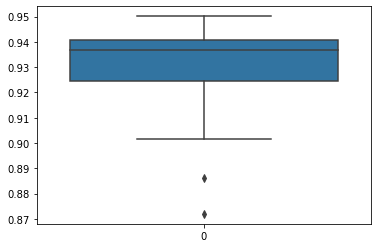

In [14]:
sns.boxplot(data=cat_df['Cat R2']);

In [15]:
d1 = pd.read_csv('OrdinalDrop1.csv')
d1.shape

(2579, 83)

In [16]:
X = d1.drop(['SalePrice'], axis=1).values
y = d1.SalePrice.values

In [17]:
dfs = evaluate_model(CatBoostRegressor(), X, y)

743:	learn: 7426.7572867	total: 5.93s	remaining: 2.04s
744:	learn: 7419.6286334	total: 5.94s	remaining: 2.03s
745:	learn: 7415.8950387	total: 5.95s	remaining: 2.02s
746:	learn: 7406.4191890	total: 5.95s	remaining: 2.02s
747:	learn: 7398.5094370	total: 5.96s	remaining: 2.01s
748:	learn: 7390.4521834	total: 5.96s	remaining: 2s
749:	learn: 7381.2888780	total: 5.98s	remaining: 1.99s
750:	learn: 7371.7864928	total: 5.98s	remaining: 1.98s
751:	learn: 7365.9711743	total: 5.99s	remaining: 1.97s
752:	learn: 7356.2114714	total: 6s	remaining: 1.97s
753:	learn: 7345.8631755	total: 6.01s	remaining: 1.96s
754:	learn: 7341.6047702	total: 6.02s	remaining: 1.95s
755:	learn: 7332.7020965	total: 6.02s	remaining: 1.94s
756:	learn: 7327.6363677	total: 6.03s	remaining: 1.94s
757:	learn: 7317.8285498	total: 6.03s	remaining: 1.93s
758:	learn: 7308.0774741	total: 6.04s	remaining: 1.92s
759:	learn: 7303.5029025	total: 6.04s	remaining: 1.91s
760:	learn: 7297.6938613	total: 6.05s	remaining: 1.9s
761:	learn: 7287.

785:	learn: 7137.0728483	total: 4.97s	remaining: 1.35s
786:	learn: 7127.0619925	total: 4.97s	remaining: 1.34s
787:	learn: 7118.0574219	total: 4.98s	remaining: 1.34s
788:	learn: 7110.1309820	total: 4.99s	remaining: 1.33s
789:	learn: 7098.4634598	total: 4.99s	remaining: 1.33s
790:	learn: 7092.9292269	total: 5s	remaining: 1.32s
791:	learn: 7086.9899672	total: 5.01s	remaining: 1.31s
792:	learn: 7081.0697633	total: 5.01s	remaining: 1.31s
793:	learn: 7072.4416077	total: 5.02s	remaining: 1.3s
794:	learn: 7068.8973007	total: 5.02s	remaining: 1.29s
795:	learn: 7061.0928116	total: 5.03s	remaining: 1.29s
796:	learn: 7052.0885888	total: 5.04s	remaining: 1.28s
797:	learn: 7047.9104695	total: 5.04s	remaining: 1.28s
798:	learn: 7047.4485508	total: 5.05s	remaining: 1.27s
799:	learn: 7040.9700600	total: 5.05s	remaining: 1.26s
800:	learn: 7031.1634720	total: 5.06s	remaining: 1.26s
801:	learn: 7026.9247548	total: 5.07s	remaining: 1.25s
802:	learn: 7022.8068516	total: 5.07s	remaining: 1.24s
803:	learn: 70

893:	learn: 6464.2398674	total: 7.04s	remaining: 835ms
894:	learn: 6457.8946150	total: 7.05s	remaining: 827ms
895:	learn: 6448.2963828	total: 7.06s	remaining: 819ms
896:	learn: 6439.2301412	total: 7.07s	remaining: 812ms
897:	learn: 6438.4902345	total: 7.07s	remaining: 803ms
898:	learn: 6429.0589647	total: 7.08s	remaining: 795ms
899:	learn: 6418.1595267	total: 7.09s	remaining: 788ms
900:	learn: 6412.8180041	total: 7.1s	remaining: 780ms
901:	learn: 6404.2917043	total: 7.1s	remaining: 772ms
902:	learn: 6403.5021448	total: 7.11s	remaining: 764ms
903:	learn: 6395.0123331	total: 7.12s	remaining: 756ms
904:	learn: 6394.0370751	total: 7.13s	remaining: 748ms
905:	learn: 6389.1644070	total: 7.13s	remaining: 740ms
906:	learn: 6383.9213403	total: 7.14s	remaining: 732ms
907:	learn: 6378.8617502	total: 7.14s	remaining: 724ms
908:	learn: 6370.8288421	total: 7.15s	remaining: 716ms
909:	learn: 6365.8777508	total: 7.16s	remaining: 708ms
910:	learn: 6357.2899527	total: 7.17s	remaining: 700ms
911:	learn: 

935:	learn: 6201.0219901	total: 5.91s	remaining: 404ms
936:	learn: 6192.1615488	total: 5.92s	remaining: 398ms
937:	learn: 6180.4854060	total: 5.93s	remaining: 392ms
938:	learn: 6175.6428777	total: 5.94s	remaining: 386ms
939:	learn: 6170.0401708	total: 5.95s	remaining: 380ms
940:	learn: 6158.0647951	total: 5.96s	remaining: 374ms
941:	learn: 6149.2454942	total: 5.97s	remaining: 368ms
942:	learn: 6144.1890834	total: 5.98s	remaining: 362ms
943:	learn: 6137.7605742	total: 5.99s	remaining: 355ms
944:	learn: 6130.3694932	total: 6s	remaining: 349ms
945:	learn: 6126.6714911	total: 6s	remaining: 343ms
946:	learn: 6121.1448947	total: 6.01s	remaining: 336ms
947:	learn: 6114.7816614	total: 6.02s	remaining: 330ms
948:	learn: 6111.3948613	total: 6.03s	remaining: 324ms
949:	learn: 6106.5260075	total: 6.03s	remaining: 318ms
950:	learn: 6101.6354552	total: 6.04s	remaining: 311ms
951:	learn: 6095.0689669	total: 6.04s	remaining: 305ms
952:	learn: 6090.2821039	total: 6.05s	remaining: 298ms
953:	learn: 6084

42:	learn: 28225.3181163	total: 371ms	remaining: 8.26s
43:	learn: 27843.1975550	total: 382ms	remaining: 8.3s
44:	learn: 27487.1723509	total: 387ms	remaining: 8.21s
45:	learn: 27129.2999150	total: 391ms	remaining: 8.11s
46:	learn: 26782.0205901	total: 396ms	remaining: 8.02s
47:	learn: 26464.9850057	total: 403ms	remaining: 8s
48:	learn: 26123.3662849	total: 426ms	remaining: 8.26s
49:	learn: 25793.7557539	total: 431ms	remaining: 8.19s
50:	learn: 25523.1338705	total: 437ms	remaining: 8.13s
51:	learn: 25215.8237069	total: 445ms	remaining: 8.11s
52:	learn: 24948.0487903	total: 452ms	remaining: 8.07s
53:	learn: 24737.9060584	total: 475ms	remaining: 8.32s
54:	learn: 24523.2838303	total: 482ms	remaining: 8.29s
55:	learn: 24266.3765955	total: 488ms	remaining: 8.23s
56:	learn: 24053.8412662	total: 500ms	remaining: 8.27s
57:	learn: 23807.0945274	total: 509ms	remaining: 8.27s
58:	learn: 23579.2028758	total: 513ms	remaining: 8.19s
59:	learn: 23400.3032620	total: 519ms	remaining: 8.14s
60:	learn: 231

82:	learn: 19908.2903460	total: 613ms	remaining: 6.77s
83:	learn: 19809.3225222	total: 618ms	remaining: 6.74s
84:	learn: 19710.5397364	total: 625ms	remaining: 6.72s
85:	learn: 19608.4620033	total: 635ms	remaining: 6.75s
86:	learn: 19504.7504681	total: 641ms	remaining: 6.72s
87:	learn: 19395.7450477	total: 647ms	remaining: 6.7s
88:	learn: 19310.6217097	total: 658ms	remaining: 6.73s
89:	learn: 19238.1236556	total: 666ms	remaining: 6.73s
90:	learn: 19169.0433942	total: 679ms	remaining: 6.79s
91:	learn: 19101.9637859	total: 689ms	remaining: 6.8s
92:	learn: 19031.8974747	total: 695ms	remaining: 6.78s
93:	learn: 18949.2550082	total: 705ms	remaining: 6.79s
94:	learn: 18881.4609846	total: 710ms	remaining: 6.76s
95:	learn: 18805.1383784	total: 718ms	remaining: 6.76s
96:	learn: 18738.3941668	total: 726ms	remaining: 6.76s
97:	learn: 18676.9302281	total: 731ms	remaining: 6.73s
98:	learn: 18602.3613177	total: 735ms	remaining: 6.69s
99:	learn: 18515.7017289	total: 747ms	remaining: 6.72s
100:	learn: 

83:	learn: 20481.4188940	total: 675ms	remaining: 7.36s
84:	learn: 20367.3375008	total: 679ms	remaining: 7.31s
85:	learn: 20244.6481677	total: 688ms	remaining: 7.31s
86:	learn: 20152.8210946	total: 692ms	remaining: 7.26s
87:	learn: 20059.4856690	total: 703ms	remaining: 7.28s
88:	learn: 19966.0796986	total: 710ms	remaining: 7.27s
89:	learn: 19935.2309751	total: 722ms	remaining: 7.3s
90:	learn: 19870.4392257	total: 731ms	remaining: 7.3s
91:	learn: 19793.3495508	total: 738ms	remaining: 7.29s
92:	learn: 19711.4700022	total: 743ms	remaining: 7.24s
93:	learn: 19635.7418342	total: 747ms	remaining: 7.2s
94:	learn: 19554.4378516	total: 753ms	remaining: 7.17s
95:	learn: 19463.2587233	total: 763ms	remaining: 7.18s
96:	learn: 19387.6084677	total: 775ms	remaining: 7.22s
97:	learn: 19325.7826355	total: 792ms	remaining: 7.29s
98:	learn: 19234.0401621	total: 799ms	remaining: 7.27s
99:	learn: 19137.0065298	total: 805ms	remaining: 7.24s
100:	learn: 19064.4423094	total: 809ms	remaining: 7.21s
101:	learn: 

190:	learn: 14779.1381053	total: 1.62s	remaining: 6.88s
191:	learn: 14754.1450337	total: 1.63s	remaining: 6.87s
192:	learn: 14715.4444217	total: 1.64s	remaining: 6.85s
193:	learn: 14696.6776983	total: 1.64s	remaining: 6.83s
194:	learn: 14663.6689908	total: 1.66s	remaining: 6.84s
195:	learn: 14641.2763127	total: 1.66s	remaining: 6.82s
196:	learn: 14603.1203841	total: 1.67s	remaining: 6.81s
197:	learn: 14573.0123714	total: 1.68s	remaining: 6.8s
198:	learn: 14539.3466178	total: 1.69s	remaining: 6.79s
199:	learn: 14507.1219002	total: 1.69s	remaining: 6.78s
200:	learn: 14479.4480116	total: 1.71s	remaining: 6.78s
201:	learn: 14438.5862893	total: 1.72s	remaining: 6.79s
202:	learn: 14403.0030063	total: 1.73s	remaining: 6.79s
203:	learn: 14363.7768475	total: 1.74s	remaining: 6.78s
204:	learn: 14329.8126573	total: 1.75s	remaining: 6.77s
205:	learn: 14303.5752937	total: 1.75s	remaining: 6.74s
206:	learn: 14277.6113923	total: 1.76s	remaining: 6.74s
207:	learn: 14246.2412833	total: 1.77s	remaining:

246:	learn: 13096.6433559	total: 1.92s	remaining: 5.86s
247:	learn: 13070.4143957	total: 1.93s	remaining: 5.85s
248:	learn: 13051.3257929	total: 1.94s	remaining: 5.84s
249:	learn: 13017.4259489	total: 1.95s	remaining: 5.84s
250:	learn: 12998.3781893	total: 1.95s	remaining: 5.82s
251:	learn: 12976.7203708	total: 1.96s	remaining: 5.83s
252:	learn: 12953.5053778	total: 1.97s	remaining: 5.83s
253:	learn: 12936.6999727	total: 1.98s	remaining: 5.82s
254:	learn: 12915.6826053	total: 1.99s	remaining: 5.81s
255:	learn: 12883.6154235	total: 2s	remaining: 5.8s
256:	learn: 12863.3615368	total: 2.01s	remaining: 5.8s
257:	learn: 12841.8348497	total: 2.02s	remaining: 5.79s
258:	learn: 12818.0571556	total: 2.03s	remaining: 5.81s
259:	learn: 12789.6882241	total: 2.04s	remaining: 5.8s
260:	learn: 12771.7187233	total: 2.04s	remaining: 5.79s
261:	learn: 12748.8571773	total: 2.05s	remaining: 5.77s
262:	learn: 12733.4145988	total: 2.06s	remaining: 5.77s
263:	learn: 12724.0585286	total: 2.06s	remaining: 5.75

231:	learn: 14159.3481391	total: 1.96s	remaining: 6.49s
232:	learn: 14135.6505226	total: 1.98s	remaining: 6.52s
233:	learn: 14116.2590663	total: 1.99s	remaining: 6.51s
234:	learn: 14090.0569909	total: 2s	remaining: 6.52s
235:	learn: 14065.0315957	total: 2.02s	remaining: 6.54s
236:	learn: 14033.2108278	total: 2.03s	remaining: 6.54s
237:	learn: 14015.1992154	total: 2.04s	remaining: 6.53s
238:	learn: 13994.9968971	total: 2.05s	remaining: 6.53s
239:	learn: 13971.6112095	total: 2.06s	remaining: 6.51s
240:	learn: 13938.4219857	total: 2.07s	remaining: 6.51s
241:	learn: 13924.6576712	total: 2.08s	remaining: 6.51s
242:	learn: 13909.7961038	total: 2.08s	remaining: 6.5s
243:	learn: 13879.5766190	total: 2.1s	remaining: 6.5s
244:	learn: 13858.0316457	total: 2.1s	remaining: 6.47s
245:	learn: 13833.2773120	total: 2.11s	remaining: 6.46s
246:	learn: 13801.8764633	total: 2.11s	remaining: 6.45s
247:	learn: 13787.8228975	total: 2.12s	remaining: 6.43s
248:	learn: 13761.3956945	total: 2.12s	remaining: 6.41s

337:	learn: 11420.5157385	total: 2.72s	remaining: 5.33s
338:	learn: 11401.9911826	total: 2.73s	remaining: 5.32s
339:	learn: 11390.3681051	total: 2.73s	remaining: 5.31s
340:	learn: 11369.6848152	total: 2.75s	remaining: 5.31s
341:	learn: 11362.0330890	total: 2.76s	remaining: 5.31s
342:	learn: 11351.0859212	total: 2.78s	remaining: 5.32s
343:	learn: 11339.0576051	total: 2.79s	remaining: 5.32s
344:	learn: 11325.8051190	total: 2.79s	remaining: 5.31s
345:	learn: 11305.9642276	total: 2.8s	remaining: 5.29s
346:	learn: 11290.5047494	total: 2.81s	remaining: 5.29s
347:	learn: 11275.1765887	total: 2.82s	remaining: 5.28s
348:	learn: 11260.6508883	total: 2.83s	remaining: 5.28s
349:	learn: 11243.9989483	total: 2.83s	remaining: 5.26s
350:	learn: 11218.4874406	total: 2.84s	remaining: 5.26s
351:	learn: 11205.1125591	total: 2.85s	remaining: 5.25s
352:	learn: 11184.0360186	total: 2.86s	remaining: 5.25s
353:	learn: 11168.9250010	total: 2.87s	remaining: 5.24s
354:	learn: 11150.8121951	total: 2.88s	remaining:

379:	learn: 10985.3632286	total: 2.99s	remaining: 4.88s
380:	learn: 10967.9661723	total: 3s	remaining: 4.87s
381:	learn: 10951.3525033	total: 3.01s	remaining: 4.86s
382:	learn: 10934.5604582	total: 3.01s	remaining: 4.85s
383:	learn: 10914.0148724	total: 3.02s	remaining: 4.84s
384:	learn: 10899.6028475	total: 3.02s	remaining: 4.83s
385:	learn: 10889.4955166	total: 3.04s	remaining: 4.83s
386:	learn: 10866.2712740	total: 3.05s	remaining: 4.83s
387:	learn: 10851.0342560	total: 3.06s	remaining: 4.82s
388:	learn: 10838.9745255	total: 3.06s	remaining: 4.81s
389:	learn: 10826.6285483	total: 3.07s	remaining: 4.8s
390:	learn: 10808.8771472	total: 3.07s	remaining: 4.79s
391:	learn: 10796.9505992	total: 3.08s	remaining: 4.78s
392:	learn: 10784.1463096	total: 3.09s	remaining: 4.77s
393:	learn: 10755.5103244	total: 3.1s	remaining: 4.77s
394:	learn: 10737.5303030	total: 3.11s	remaining: 4.76s
395:	learn: 10734.6857621	total: 3.12s	remaining: 4.76s
396:	learn: 10715.5536938	total: 3.13s	remaining: 4.7

380:	learn: 10626.2495868	total: 3.04s	remaining: 4.93s
381:	learn: 10615.7572053	total: 3.05s	remaining: 4.93s
382:	learn: 10585.7281982	total: 3.06s	remaining: 4.92s
383:	learn: 10570.2021955	total: 3.06s	remaining: 4.91s
384:	learn: 10567.3949185	total: 3.07s	remaining: 4.9s
385:	learn: 10554.2455580	total: 3.07s	remaining: 4.89s
386:	learn: 10540.6743570	total: 3.08s	remaining: 4.88s
387:	learn: 10529.9507537	total: 3.09s	remaining: 4.87s
388:	learn: 10514.0032603	total: 3.1s	remaining: 4.86s
389:	learn: 10500.3245980	total: 3.1s	remaining: 4.85s
390:	learn: 10485.5248289	total: 3.11s	remaining: 4.84s
391:	learn: 10482.1407894	total: 3.11s	remaining: 4.82s
392:	learn: 10480.0949491	total: 3.12s	remaining: 4.81s
393:	learn: 10462.1731961	total: 3.12s	remaining: 4.8s
394:	learn: 10448.7325244	total: 3.13s	remaining: 4.8s
395:	learn: 10430.9159509	total: 3.14s	remaining: 4.79s
396:	learn: 10429.5549069	total: 3.14s	remaining: 4.77s
397:	learn: 10412.7405010	total: 3.15s	remaining: 4.7

485:	learn: 9351.8998301	total: 3.86s	remaining: 4.08s
486:	learn: 9336.7820285	total: 3.87s	remaining: 4.07s
487:	learn: 9322.2511352	total: 3.87s	remaining: 4.07s
488:	learn: 9311.0725339	total: 3.88s	remaining: 4.06s
489:	learn: 9300.8406123	total: 3.9s	remaining: 4.05s
490:	learn: 9287.3284697	total: 3.9s	remaining: 4.04s
491:	learn: 9281.2384115	total: 3.9s	remaining: 4.03s
492:	learn: 9270.5750900	total: 3.92s	remaining: 4.03s
493:	learn: 9261.9034762	total: 3.92s	remaining: 4.01s
494:	learn: 9250.3073007	total: 3.93s	remaining: 4s
495:	learn: 9239.2496306	total: 3.93s	remaining: 4s
496:	learn: 9228.1637065	total: 3.94s	remaining: 3.98s
497:	learn: 9220.3043442	total: 3.94s	remaining: 3.97s
498:	learn: 9208.9768473	total: 3.96s	remaining: 3.97s
499:	learn: 9190.5436167	total: 3.97s	remaining: 3.97s
500:	learn: 9182.2341617	total: 3.98s	remaining: 3.96s
501:	learn: 9169.4909768	total: 3.98s	remaining: 3.95s
502:	learn: 9160.1498667	total: 3.99s	remaining: 3.94s
503:	learn: 9143.75

528:	learn: 9106.3121428	total: 4.12s	remaining: 3.67s
529:	learn: 9095.0389391	total: 4.12s	remaining: 3.65s
530:	learn: 9085.4767985	total: 4.13s	remaining: 3.65s
531:	learn: 9072.9968671	total: 4.13s	remaining: 3.63s
532:	learn: 9066.0783911	total: 4.14s	remaining: 3.63s
533:	learn: 9057.4872261	total: 4.14s	remaining: 3.62s
534:	learn: 9048.0699118	total: 4.15s	remaining: 3.61s
535:	learn: 9039.7179886	total: 4.16s	remaining: 3.6s
536:	learn: 9027.7983081	total: 4.16s	remaining: 3.59s
537:	learn: 9013.1310644	total: 4.17s	remaining: 3.58s
538:	learn: 9001.7159032	total: 4.18s	remaining: 3.57s
539:	learn: 8988.7276838	total: 4.19s	remaining: 3.57s
540:	learn: 8982.7061922	total: 4.2s	remaining: 3.56s
541:	learn: 8971.0994342	total: 4.2s	remaining: 3.55s
542:	learn: 8964.1167346	total: 4.21s	remaining: 3.55s
543:	learn: 8952.6533571	total: 4.22s	remaining: 3.54s
544:	learn: 8943.2959110	total: 4.22s	remaining: 3.53s
545:	learn: 8931.9038009	total: 4.23s	remaining: 3.52s
546:	learn: 8

526:	learn: 9367.5633644	total: 4.39s	remaining: 3.94s
527:	learn: 9354.6169360	total: 4.39s	remaining: 3.93s
528:	learn: 9342.1389830	total: 4.41s	remaining: 3.92s
529:	learn: 9331.4935747	total: 4.42s	remaining: 3.92s
530:	learn: 9328.7049291	total: 4.43s	remaining: 3.91s
531:	learn: 9319.5560825	total: 4.44s	remaining: 3.9s
532:	learn: 9306.9871190	total: 4.44s	remaining: 3.89s
533:	learn: 9296.0638504	total: 4.45s	remaining: 3.88s
534:	learn: 9283.6324282	total: 4.45s	remaining: 3.87s
535:	learn: 9274.2940317	total: 4.46s	remaining: 3.86s
536:	learn: 9266.3027659	total: 4.47s	remaining: 3.85s
537:	learn: 9252.3078933	total: 4.47s	remaining: 3.84s
538:	learn: 9239.0447726	total: 4.49s	remaining: 3.84s
539:	learn: 9225.0477255	total: 4.5s	remaining: 3.83s
540:	learn: 9213.1906567	total: 4.5s	remaining: 3.82s
541:	learn: 9205.5472833	total: 4.51s	remaining: 3.81s
542:	learn: 9193.8113790	total: 4.51s	remaining: 3.8s
543:	learn: 9176.1472345	total: 4.52s	remaining: 3.79s
544:	learn: 91

675:	learn: 7764.2295024	total: 5.1s	remaining: 2.45s
676:	learn: 7754.8036223	total: 5.11s	remaining: 2.44s
677:	learn: 7743.9403937	total: 5.12s	remaining: 2.43s
678:	learn: 7735.0869017	total: 5.13s	remaining: 2.42s
679:	learn: 7733.1682028	total: 5.13s	remaining: 2.42s
680:	learn: 7725.1367397	total: 5.15s	remaining: 2.41s
681:	learn: 7717.1012098	total: 5.16s	remaining: 2.41s
682:	learn: 7711.0292289	total: 5.17s	remaining: 2.4s
683:	learn: 7699.1171499	total: 5.17s	remaining: 2.39s
684:	learn: 7691.6842947	total: 5.18s	remaining: 2.38s
685:	learn: 7675.4885750	total: 5.2s	remaining: 2.38s
686:	learn: 7665.4014561	total: 5.21s	remaining: 2.37s
687:	learn: 7654.3003035	total: 5.22s	remaining: 2.37s
688:	learn: 7650.8604825	total: 5.22s	remaining: 2.36s
689:	learn: 7644.0469514	total: 5.23s	remaining: 2.35s
690:	learn: 7633.9108462	total: 5.24s	remaining: 2.34s
691:	learn: 7627.6188626	total: 5.25s	remaining: 2.34s
692:	learn: 7619.2175999	total: 5.26s	remaining: 2.33s
693:	learn: 7

679:	learn: 7547.1762787	total: 5.57s	remaining: 2.62s
680:	learn: 7546.5980798	total: 5.57s	remaining: 2.61s
681:	learn: 7538.1784749	total: 5.58s	remaining: 2.6s
682:	learn: 7533.6984756	total: 5.58s	remaining: 2.59s
683:	learn: 7523.6289604	total: 5.59s	remaining: 2.58s
684:	learn: 7515.6721431	total: 5.59s	remaining: 2.57s
685:	learn: 7505.5999570	total: 5.6s	remaining: 2.56s
686:	learn: 7501.1844662	total: 5.61s	remaining: 2.55s
687:	learn: 7492.5083518	total: 5.61s	remaining: 2.55s
688:	learn: 7480.9453336	total: 5.62s	remaining: 2.54s
689:	learn: 7472.3364788	total: 5.63s	remaining: 2.53s
690:	learn: 7462.3470096	total: 5.64s	remaining: 2.52s
691:	learn: 7457.7713262	total: 5.64s	remaining: 2.51s
692:	learn: 7447.7606002	total: 5.66s	remaining: 2.51s
693:	learn: 7438.3798167	total: 5.66s	remaining: 2.5s
694:	learn: 7433.0355436	total: 5.67s	remaining: 2.49s
695:	learn: 7422.8783184	total: 5.68s	remaining: 2.48s
696:	learn: 7413.2306707	total: 5.68s	remaining: 2.47s
697:	learn: 7

678:	learn: 7790.0174778	total: 5.29s	remaining: 2.5s
679:	learn: 7782.1233695	total: 5.3s	remaining: 2.49s
680:	learn: 7774.2724942	total: 5.31s	remaining: 2.49s
681:	learn: 7773.9209276	total: 5.31s	remaining: 2.48s
682:	learn: 7762.7439048	total: 5.33s	remaining: 2.47s
683:	learn: 7753.8235149	total: 5.35s	remaining: 2.47s
684:	learn: 7753.4823962	total: 5.36s	remaining: 2.46s
685:	learn: 7746.5489500	total: 5.37s	remaining: 2.46s
686:	learn: 7739.5330924	total: 5.38s	remaining: 2.45s
687:	learn: 7731.1616896	total: 5.39s	remaining: 2.44s
688:	learn: 7719.2136929	total: 5.39s	remaining: 2.43s
689:	learn: 7718.4756993	total: 5.39s	remaining: 2.42s
690:	learn: 7712.2125811	total: 5.4s	remaining: 2.42s
691:	learn: 7701.1578094	total: 5.41s	remaining: 2.41s
692:	learn: 7691.5255143	total: 5.42s	remaining: 2.4s
693:	learn: 7683.4750787	total: 5.43s	remaining: 2.39s
694:	learn: 7674.3790124	total: 5.43s	remaining: 2.38s
695:	learn: 7661.5198832	total: 5.44s	remaining: 2.38s
696:	learn: 76

825:	learn: 6721.9331991	total: 6.28s	remaining: 1.32s
826:	learn: 6720.1242489	total: 6.28s	remaining: 1.31s
827:	learn: 6712.6625829	total: 6.29s	remaining: 1.31s
828:	learn: 6706.3659563	total: 6.3s	remaining: 1.3s
829:	learn: 6703.5108861	total: 6.31s	remaining: 1.29s
830:	learn: 6700.1637365	total: 6.31s	remaining: 1.28s
831:	learn: 6692.4653279	total: 6.32s	remaining: 1.27s
832:	learn: 6689.4445937	total: 6.32s	remaining: 1.27s
833:	learn: 6681.7009667	total: 6.33s	remaining: 1.26s
834:	learn: 6673.1226113	total: 6.34s	remaining: 1.25s
835:	learn: 6671.4872621	total: 6.34s	remaining: 1.24s
836:	learn: 6664.5938105	total: 6.35s	remaining: 1.24s
837:	learn: 6658.0751599	total: 6.36s	remaining: 1.23s
838:	learn: 6652.5322535	total: 6.36s	remaining: 1.22s
839:	learn: 6646.2976085	total: 6.37s	remaining: 1.21s
840:	learn: 6643.1701437	total: 6.37s	remaining: 1.21s
841:	learn: 6633.1712700	total: 6.38s	remaining: 1.2s
842:	learn: 6626.3488777	total: 6.39s	remaining: 1.19s
843:	learn: 6

829:	learn: 6539.4953784	total: 6.73s	remaining: 1.38s
830:	learn: 6529.7361366	total: 6.74s	remaining: 1.37s
831:	learn: 6523.0047938	total: 6.75s	remaining: 1.36s
832:	learn: 6516.8332832	total: 6.76s	remaining: 1.35s
833:	learn: 6510.1365720	total: 6.76s	remaining: 1.35s
834:	learn: 6504.7913316	total: 6.77s	remaining: 1.34s
835:	learn: 6504.2979782	total: 6.79s	remaining: 1.33s
836:	learn: 6498.4986518	total: 6.8s	remaining: 1.32s
837:	learn: 6494.4332985	total: 6.8s	remaining: 1.31s
838:	learn: 6488.0641936	total: 6.81s	remaining: 1.31s
839:	learn: 6480.8580892	total: 6.81s	remaining: 1.3s
840:	learn: 6472.4997187	total: 6.82s	remaining: 1.29s
841:	learn: 6467.5467539	total: 6.83s	remaining: 1.28s
842:	learn: 6463.1149990	total: 6.84s	remaining: 1.27s
843:	learn: 6456.9532615	total: 6.85s	remaining: 1.26s
844:	learn: 6454.0986208	total: 6.85s	remaining: 1.26s
845:	learn: 6447.3510157	total: 6.86s	remaining: 1.25s
846:	learn: 6438.8200937	total: 6.86s	remaining: 1.24s
847:	learn: 6

975:	learn: 5911.0296822	total: 7.26s	remaining: 179ms
976:	learn: 5905.3393854	total: 7.26s	remaining: 171ms
977:	learn: 5899.1312742	total: 7.27s	remaining: 163ms
978:	learn: 5891.9353163	total: 7.27s	remaining: 156ms
979:	learn: 5889.4677592	total: 7.28s	remaining: 149ms
980:	learn: 5884.4284519	total: 7.28s	remaining: 141ms
981:	learn: 5879.3134109	total: 7.29s	remaining: 134ms
982:	learn: 5873.5271575	total: 7.29s	remaining: 126ms
983:	learn: 5866.7221851	total: 7.29s	remaining: 119ms
984:	learn: 5858.3296712	total: 7.3s	remaining: 111ms
985:	learn: 5848.7258637	total: 7.3s	remaining: 104ms
986:	learn: 5840.9860364	total: 7.31s	remaining: 96.3ms
987:	learn: 5836.2155763	total: 7.31s	remaining: 88.8ms
988:	learn: 5828.7046113	total: 7.32s	remaining: 81.4ms
989:	learn: 5827.9524347	total: 7.32s	remaining: 73.9ms
990:	learn: 5824.7830440	total: 7.32s	remaining: 66.5ms
991:	learn: 5818.2821136	total: 7.33s	remaining: 59.1ms
992:	learn: 5809.3089699	total: 7.33s	remaining: 51.7ms
993:	

979:	learn: 5687.1205600	total: 7.58s	remaining: 155ms
980:	learn: 5684.6340734	total: 7.58s	remaining: 147ms
981:	learn: 5678.7579115	total: 7.59s	remaining: 139ms
982:	learn: 5674.8352128	total: 7.59s	remaining: 131ms
983:	learn: 5671.5276804	total: 7.6s	remaining: 124ms
984:	learn: 5662.2383600	total: 7.6s	remaining: 116ms
985:	learn: 5657.0519814	total: 7.6s	remaining: 108ms
986:	learn: 5656.0279801	total: 7.61s	remaining: 100ms
987:	learn: 5653.7765899	total: 7.61s	remaining: 92.4ms
988:	learn: 5652.4841685	total: 7.61s	remaining: 84.7ms
989:	learn: 5646.3034811	total: 7.62s	remaining: 77ms
990:	learn: 5641.0786845	total: 7.62s	remaining: 69.2ms
991:	learn: 5636.3790678	total: 7.63s	remaining: 61.5ms
992:	learn: 5631.9780104	total: 7.63s	remaining: 53.8ms
993:	learn: 5625.9641180	total: 7.64s	remaining: 46.1ms
994:	learn: 5624.4963124	total: 7.64s	remaining: 38.4ms
995:	learn: 5618.7544184	total: 7.64s	remaining: 30.7ms
996:	learn: 5614.3849011	total: 7.65s	remaining: 23ms
997:	le

785:	learn: 6822.0880792	total: 6.27s	remaining: 1.71s
786:	learn: 6821.5694940	total: 6.28s	remaining: 1.7s
787:	learn: 6813.0794239	total: 6.29s	remaining: 1.69s
788:	learn: 6808.5693942	total: 6.29s	remaining: 1.68s
789:	learn: 6807.8311818	total: 6.3s	remaining: 1.68s
790:	learn: 6805.7267167	total: 6.31s	remaining: 1.67s
791:	learn: 6800.2004368	total: 6.32s	remaining: 1.66s
792:	learn: 6792.1771246	total: 6.32s	remaining: 1.65s
793:	learn: 6786.5029385	total: 6.33s	remaining: 1.64s
794:	learn: 6776.8774877	total: 6.34s	remaining: 1.63s
795:	learn: 6768.0703741	total: 6.34s	remaining: 1.63s
796:	learn: 6761.4246348	total: 6.35s	remaining: 1.62s
797:	learn: 6755.9677633	total: 6.36s	remaining: 1.61s
798:	learn: 6748.8748085	total: 6.36s	remaining: 1.6s
799:	learn: 6747.8125887	total: 6.37s	remaining: 1.59s
800:	learn: 6741.1643130	total: 6.38s	remaining: 1.58s
801:	learn: 6735.5652767	total: 6.38s	remaining: 1.57s
802:	learn: 6730.8000927	total: 6.39s	remaining: 1.57s
803:	learn: 6

127:	learn: 17186.4480013	total: 594ms	remaining: 4.05s
128:	learn: 17128.9273858	total: 601ms	remaining: 4.06s
129:	learn: 17069.8101581	total: 606ms	remaining: 4.06s
130:	learn: 17036.1428748	total: 609ms	remaining: 4.04s
131:	learn: 16985.1663570	total: 613ms	remaining: 4.03s
132:	learn: 16943.4725550	total: 618ms	remaining: 4.03s
133:	learn: 16899.9460100	total: 624ms	remaining: 4.04s
134:	learn: 16852.0409533	total: 631ms	remaining: 4.05s
135:	learn: 16799.7201881	total: 637ms	remaining: 4.04s
136:	learn: 16766.5856690	total: 641ms	remaining: 4.04s
137:	learn: 16723.1120910	total: 644ms	remaining: 4.02s
138:	learn: 16687.9900518	total: 647ms	remaining: 4.01s
139:	learn: 16644.5359421	total: 653ms	remaining: 4.01s
140:	learn: 16588.9342089	total: 657ms	remaining: 4s
141:	learn: 16563.0423177	total: 660ms	remaining: 3.99s
142:	learn: 16525.6499086	total: 664ms	remaining: 3.98s
143:	learn: 16487.1169626	total: 668ms	remaining: 3.97s
144:	learn: 16461.7154697	total: 672ms	remaining: 3

826:	learn: 6848.1786922	total: 6.72s	remaining: 1.41s
827:	learn: 6840.6297914	total: 6.73s	remaining: 1.4s
828:	learn: 6833.9762750	total: 6.73s	remaining: 1.39s
829:	learn: 6830.3590349	total: 6.74s	remaining: 1.38s
830:	learn: 6823.5465126	total: 6.75s	remaining: 1.37s
831:	learn: 6819.3249223	total: 6.75s	remaining: 1.36s
832:	learn: 6812.8855294	total: 6.76s	remaining: 1.35s
833:	learn: 6804.2767988	total: 6.76s	remaining: 1.35s
834:	learn: 6796.7980288	total: 6.77s	remaining: 1.34s
835:	learn: 6789.4421706	total: 6.78s	remaining: 1.33s
836:	learn: 6782.4074163	total: 6.79s	remaining: 1.32s
837:	learn: 6777.1405130	total: 6.79s	remaining: 1.31s
838:	learn: 6766.1299178	total: 6.8s	remaining: 1.3s
839:	learn: 6758.9685117	total: 6.81s	remaining: 1.3s
840:	learn: 6757.6018044	total: 6.81s	remaining: 1.29s
841:	learn: 6750.8436491	total: 6.82s	remaining: 1.28s
842:	learn: 6748.9678103	total: 6.82s	remaining: 1.27s
843:	learn: 6741.1928818	total: 6.83s	remaining: 1.26s
844:	learn: 67

270:	learn: 13166.2075188	total: 1.26s	remaining: 3.4s
271:	learn: 13149.9077869	total: 1.27s	remaining: 3.4s
272:	learn: 13147.2646708	total: 1.27s	remaining: 3.4s
273:	learn: 13128.3809475	total: 1.28s	remaining: 3.39s
274:	learn: 13102.6474825	total: 1.28s	remaining: 3.39s
275:	learn: 13073.0900673	total: 1.29s	remaining: 3.38s
276:	learn: 13052.1584195	total: 1.29s	remaining: 3.38s
277:	learn: 13025.5933264	total: 1.3s	remaining: 3.38s
278:	learn: 13000.1304821	total: 1.3s	remaining: 3.37s
279:	learn: 12973.2233871	total: 1.31s	remaining: 3.37s
280:	learn: 12951.3306295	total: 1.32s	remaining: 3.37s
281:	learn: 12935.2090327	total: 1.32s	remaining: 3.36s
282:	learn: 12916.9799309	total: 1.32s	remaining: 3.35s
283:	learn: 12895.9215741	total: 1.33s	remaining: 3.35s
284:	learn: 12877.1508643	total: 1.33s	remaining: 3.34s
285:	learn: 12848.5880422	total: 1.34s	remaining: 3.34s
286:	learn: 12823.5023277	total: 1.34s	remaining: 3.34s
287:	learn: 12806.7464296	total: 1.35s	remaining: 3.3

275:	learn: 13020.5974535	total: 1.33s	remaining: 3.49s
276:	learn: 13007.5472254	total: 1.33s	remaining: 3.48s
277:	learn: 12983.3159985	total: 1.34s	remaining: 3.47s
278:	learn: 12965.1958168	total: 1.34s	remaining: 3.46s
279:	learn: 12958.0343060	total: 1.34s	remaining: 3.46s
280:	learn: 12934.1275646	total: 1.35s	remaining: 3.45s
281:	learn: 12913.7041213	total: 1.35s	remaining: 3.45s
282:	learn: 12910.8517009	total: 1.36s	remaining: 3.45s
283:	learn: 12896.7990208	total: 1.36s	remaining: 3.44s
284:	learn: 12877.8041159	total: 1.37s	remaining: 3.44s
285:	learn: 12859.0102134	total: 1.38s	remaining: 3.44s
286:	learn: 12845.0587431	total: 1.38s	remaining: 3.44s
287:	learn: 12812.8852816	total: 1.39s	remaining: 3.43s
288:	learn: 12796.4635100	total: 1.39s	remaining: 3.43s
289:	learn: 12779.7966923	total: 1.4s	remaining: 3.43s
290:	learn: 12758.5545288	total: 1.41s	remaining: 3.42s
291:	learn: 12747.8360436	total: 1.41s	remaining: 3.42s
292:	learn: 12720.2169284	total: 1.42s	remaining:

935:	learn: 5927.5399509	total: 7.53s	remaining: 515ms
936:	learn: 5921.4555276	total: 7.54s	remaining: 507ms
937:	learn: 5911.7082065	total: 7.56s	remaining: 500ms
938:	learn: 5906.2975205	total: 7.58s	remaining: 492ms
939:	learn: 5900.1587718	total: 7.59s	remaining: 485ms
940:	learn: 5892.4712505	total: 7.61s	remaining: 477ms
941:	learn: 5885.6618653	total: 7.61s	remaining: 469ms
942:	learn: 5883.6534718	total: 7.62s	remaining: 461ms
943:	learn: 5878.1372732	total: 7.63s	remaining: 453ms
944:	learn: 5873.1086086	total: 7.64s	remaining: 445ms
945:	learn: 5865.1425691	total: 7.66s	remaining: 437ms
946:	learn: 5861.7265789	total: 7.67s	remaining: 429ms
947:	learn: 5855.7890879	total: 7.69s	remaining: 422ms
948:	learn: 5849.9669313	total: 7.7s	remaining: 414ms
949:	learn: 5844.6324580	total: 7.71s	remaining: 406ms
950:	learn: 5837.4078922	total: 7.72s	remaining: 398ms
951:	learn: 5831.5543245	total: 7.73s	remaining: 390ms
952:	learn: 5826.9451274	total: 7.74s	remaining: 382ms
953:	learn:

422:	learn: 10608.4037404	total: 2.02s	remaining: 2.76s
423:	learn: 10594.5270878	total: 2.03s	remaining: 2.76s
424:	learn: 10582.1803205	total: 2.04s	remaining: 2.75s
425:	learn: 10579.2586426	total: 2.04s	remaining: 2.75s
426:	learn: 10567.8922058	total: 2.04s	remaining: 2.75s
427:	learn: 10556.1859102	total: 2.05s	remaining: 2.74s
428:	learn: 10540.2352617	total: 2.05s	remaining: 2.73s
429:	learn: 10534.2007406	total: 2.06s	remaining: 2.73s
430:	learn: 10516.4464556	total: 2.06s	remaining: 2.72s
431:	learn: 10503.7932583	total: 2.07s	remaining: 2.72s
432:	learn: 10489.9655721	total: 2.07s	remaining: 2.71s
433:	learn: 10482.9766883	total: 2.08s	remaining: 2.71s
434:	learn: 10464.3647077	total: 2.08s	remaining: 2.7s
435:	learn: 10452.6345714	total: 2.09s	remaining: 2.7s
436:	learn: 10435.2760717	total: 2.09s	remaining: 2.69s
437:	learn: 10420.8221841	total: 2.1s	remaining: 2.69s
438:	learn: 10408.4872097	total: 2.11s	remaining: 2.69s
439:	learn: 10396.1133284	total: 2.11s	remaining: 2

566:	learn: 8916.5847487	total: 2.71s	remaining: 2.07s
567:	learn: 8912.6189190	total: 2.71s	remaining: 2.06s
568:	learn: 8903.1332762	total: 2.71s	remaining: 2.06s
569:	learn: 8893.7618791	total: 2.72s	remaining: 2.05s
570:	learn: 8879.2930929	total: 2.72s	remaining: 2.04s
571:	learn: 8874.3833397	total: 2.73s	remaining: 2.04s
572:	learn: 8860.3614761	total: 2.73s	remaining: 2.04s
573:	learn: 8859.7642127	total: 2.73s	remaining: 2.03s
574:	learn: 8846.3809296	total: 2.75s	remaining: 2.03s
575:	learn: 8837.5996795	total: 2.75s	remaining: 2.03s
576:	learn: 8826.2877146	total: 2.76s	remaining: 2.02s
577:	learn: 8824.0690442	total: 2.77s	remaining: 2.02s
578:	learn: 8815.3653836	total: 2.77s	remaining: 2.02s
579:	learn: 8807.7858808	total: 2.78s	remaining: 2.01s
580:	learn: 8795.4644470	total: 2.78s	remaining: 2.01s
581:	learn: 8785.4675473	total: 2.79s	remaining: 2s
582:	learn: 8776.8430443	total: 2.79s	remaining: 2s
583:	learn: 8770.3498288	total: 2.8s	remaining: 1.99s
584:	learn: 8761.

571:	learn: 8920.8880556	total: 2.75s	remaining: 2.06s
572:	learn: 8910.1633475	total: 2.75s	remaining: 2.05s
573:	learn: 8895.1459912	total: 2.76s	remaining: 2.05s
574:	learn: 8887.6295305	total: 2.76s	remaining: 2.04s
575:	learn: 8881.5658725	total: 2.77s	remaining: 2.04s
576:	learn: 8879.0558014	total: 2.77s	remaining: 2.03s
577:	learn: 8865.5464968	total: 2.78s	remaining: 2.03s
578:	learn: 8858.5048935	total: 2.78s	remaining: 2.02s
579:	learn: 8842.3335996	total: 2.79s	remaining: 2.02s
580:	learn: 8832.0292643	total: 2.79s	remaining: 2.01s
581:	learn: 8830.0264403	total: 2.8s	remaining: 2.01s
582:	learn: 8820.2693500	total: 2.8s	remaining: 2s
583:	learn: 8809.9877373	total: 2.8s	remaining: 2s
584:	learn: 8799.0708413	total: 2.81s	remaining: 1.99s
585:	learn: 8788.1626888	total: 2.81s	remaining: 1.99s
586:	learn: 8786.3625012	total: 2.82s	remaining: 1.98s
587:	learn: 8775.4754134	total: 2.82s	remaining: 1.98s
588:	learn: 8771.7213026	total: 2.83s	remaining: 1.97s
589:	learn: 8754.94

84:	learn: 19712.6179135	total: 877ms	remaining: 9.44s
85:	learn: 19617.4564246	total: 895ms	remaining: 9.51s
86:	learn: 19512.2133132	total: 909ms	remaining: 9.54s
87:	learn: 19415.9610863	total: 916ms	remaining: 9.49s
88:	learn: 19334.2027503	total: 930ms	remaining: 9.52s
89:	learn: 19248.2048294	total: 948ms	remaining: 9.58s
90:	learn: 19185.4500097	total: 957ms	remaining: 9.56s
91:	learn: 19120.4536884	total: 965ms	remaining: 9.52s
92:	learn: 19049.1288442	total: 984ms	remaining: 9.59s
93:	learn: 18967.6485612	total: 993ms	remaining: 9.57s
94:	learn: 18877.7376951	total: 999ms	remaining: 9.52s
95:	learn: 18800.4507115	total: 1.01s	remaining: 9.53s
96:	learn: 18744.4632863	total: 1.02s	remaining: 9.49s
97:	learn: 18704.9689055	total: 1.03s	remaining: 9.45s
98:	learn: 18632.6669218	total: 1.03s	remaining: 9.41s
99:	learn: 18557.8597587	total: 1.04s	remaining: 9.34s
100:	learn: 18491.0678641	total: 1.05s	remaining: 9.31s
101:	learn: 18424.7487968	total: 1.06s	remaining: 9.31s
102:	lea

127:	learn: 16937.8499003	total: 1.31s	remaining: 8.96s
128:	learn: 16899.4445169	total: 1.32s	remaining: 8.94s
129:	learn: 16828.5823167	total: 1.33s	remaining: 8.93s
130:	learn: 16787.5903638	total: 1.34s	remaining: 8.88s
131:	learn: 16741.2746334	total: 1.34s	remaining: 8.85s
132:	learn: 16679.7058626	total: 1.35s	remaining: 8.84s
133:	learn: 16646.2401282	total: 1.36s	remaining: 8.82s
134:	learn: 16600.9006580	total: 1.38s	remaining: 8.82s
135:	learn: 16543.6984099	total: 1.39s	remaining: 8.81s
136:	learn: 16501.9521799	total: 1.39s	remaining: 8.78s
137:	learn: 16462.6076418	total: 1.4s	remaining: 8.74s
138:	learn: 16415.3341652	total: 1.41s	remaining: 8.71s
139:	learn: 16361.7727588	total: 1.41s	remaining: 8.68s
140:	learn: 16313.5995779	total: 1.43s	remaining: 8.68s
141:	learn: 16268.9940124	total: 1.44s	remaining: 8.69s
142:	learn: 16237.8898539	total: 1.45s	remaining: 8.67s
143:	learn: 16207.4414099	total: 1.46s	remaining: 8.65s
144:	learn: 16159.2564267	total: 1.47s	remaining:

232:	learn: 13591.8559776	total: 2.41s	remaining: 7.92s
233:	learn: 13556.2849797	total: 2.42s	remaining: 7.91s
234:	learn: 13548.0853929	total: 2.43s	remaining: 7.9s
235:	learn: 13513.6062802	total: 2.44s	remaining: 7.9s
236:	learn: 13494.5001423	total: 2.45s	remaining: 7.89s
237:	learn: 13457.4169719	total: 2.46s	remaining: 7.89s
238:	learn: 13430.4361444	total: 2.48s	remaining: 7.89s
239:	learn: 13406.7701195	total: 2.49s	remaining: 7.88s
240:	learn: 13376.6626628	total: 2.5s	remaining: 7.88s
241:	learn: 13357.3819191	total: 2.51s	remaining: 7.87s
242:	learn: 13335.2468520	total: 2.52s	remaining: 7.87s
243:	learn: 13319.4309358	total: 2.53s	remaining: 7.85s
244:	learn: 13290.5212385	total: 2.54s	remaining: 7.83s
245:	learn: 13283.4842855	total: 2.55s	remaining: 7.81s
246:	learn: 13259.2047905	total: 2.56s	remaining: 7.79s
247:	learn: 13237.4810103	total: 2.57s	remaining: 7.78s
248:	learn: 13212.9431300	total: 2.57s	remaining: 7.76s
249:	learn: 13205.8714767	total: 2.58s	remaining: 7

273:	learn: 13049.6915942	total: 2.77s	remaining: 7.34s
274:	learn: 13034.1330635	total: 2.78s	remaining: 7.32s
275:	learn: 13027.7661317	total: 2.79s	remaining: 7.31s
276:	learn: 13003.8471730	total: 2.8s	remaining: 7.31s
277:	learn: 12978.1989994	total: 2.81s	remaining: 7.3s
278:	learn: 12974.6676089	total: 2.82s	remaining: 7.29s
279:	learn: 12957.4254883	total: 2.83s	remaining: 7.28s
280:	learn: 12948.2248395	total: 2.85s	remaining: 7.28s
281:	learn: 12939.9618363	total: 2.86s	remaining: 7.28s
282:	learn: 12937.3267839	total: 2.87s	remaining: 7.27s
283:	learn: 12912.8392675	total: 2.88s	remaining: 7.25s
284:	learn: 12895.3045811	total: 2.89s	remaining: 7.24s
285:	learn: 12882.4367501	total: 2.9s	remaining: 7.23s
286:	learn: 12859.6842822	total: 2.9s	remaining: 7.21s
287:	learn: 12828.5278647	total: 2.91s	remaining: 7.2s
288:	learn: 12810.9602006	total: 2.92s	remaining: 7.19s
289:	learn: 12791.4864259	total: 2.93s	remaining: 7.18s
290:	learn: 12768.0600542	total: 2.94s	remaining: 7.1

379:	learn: 10892.6920104	total: 3.71s	remaining: 6.06s
380:	learn: 10873.6944571	total: 3.72s	remaining: 6.05s
381:	learn: 10859.9267623	total: 3.73s	remaining: 6.04s
382:	learn: 10840.9323262	total: 3.74s	remaining: 6.03s
383:	learn: 10814.1686917	total: 3.75s	remaining: 6.02s
384:	learn: 10798.5401498	total: 3.76s	remaining: 6.01s
385:	learn: 10795.1699629	total: 3.77s	remaining: 5.99s
386:	learn: 10787.0415075	total: 3.78s	remaining: 5.99s
387:	learn: 10773.4301324	total: 3.79s	remaining: 5.98s
388:	learn: 10759.6602109	total: 3.8s	remaining: 5.97s
389:	learn: 10743.0382847	total: 3.81s	remaining: 5.96s
390:	learn: 10719.3617830	total: 3.82s	remaining: 5.95s
391:	learn: 10706.4407998	total: 3.83s	remaining: 5.94s
392:	learn: 10692.6942371	total: 3.83s	remaining: 5.92s
393:	learn: 10691.2347846	total: 3.84s	remaining: 5.91s
394:	learn: 10674.5753380	total: 3.86s	remaining: 5.91s
395:	learn: 10665.9580463	total: 3.87s	remaining: 5.89s
396:	learn: 10656.6304162	total: 3.88s	remaining:

421:	learn: 10713.1273442	total: 4.06s	remaining: 5.56s
422:	learn: 10696.5299957	total: 4.07s	remaining: 5.55s
423:	learn: 10695.5460599	total: 4.07s	remaining: 5.53s
424:	learn: 10681.9084537	total: 4.08s	remaining: 5.52s
425:	learn: 10666.8360590	total: 4.08s	remaining: 5.5s
426:	learn: 10662.2036879	total: 4.09s	remaining: 5.48s
427:	learn: 10650.3440048	total: 4.09s	remaining: 5.47s
428:	learn: 10630.6202601	total: 4.1s	remaining: 5.45s
429:	learn: 10619.3225056	total: 4.1s	remaining: 5.44s
430:	learn: 10603.1245958	total: 4.11s	remaining: 5.42s
431:	learn: 10586.4051832	total: 4.11s	remaining: 5.41s
432:	learn: 10580.8523295	total: 4.12s	remaining: 5.4s
433:	learn: 10562.8117046	total: 4.13s	remaining: 5.38s
434:	learn: 10546.1273425	total: 4.13s	remaining: 5.37s
435:	learn: 10527.8653745	total: 4.14s	remaining: 5.35s
436:	learn: 10509.8226269	total: 4.14s	remaining: 5.33s
437:	learn: 10500.9859095	total: 4.14s	remaining: 5.32s
438:	learn: 10486.3248370	total: 4.15s	remaining: 5.

528:	learn: 9116.7930580	total: 4.52s	remaining: 4.02s
529:	learn: 9101.5115709	total: 4.52s	remaining: 4.01s
530:	learn: 9087.3725195	total: 4.52s	remaining: 4s
531:	learn: 9079.8953581	total: 4.53s	remaining: 3.98s
532:	learn: 9070.4465820	total: 4.53s	remaining: 3.97s
533:	learn: 9057.3152293	total: 4.53s	remaining: 3.96s
534:	learn: 9051.6434109	total: 4.54s	remaining: 3.94s
535:	learn: 9042.9100790	total: 4.54s	remaining: 3.93s
536:	learn: 9034.7725062	total: 4.54s	remaining: 3.92s
537:	learn: 9024.1456034	total: 4.55s	remaining: 3.9s
538:	learn: 9012.9117871	total: 4.55s	remaining: 3.89s
539:	learn: 9011.1949484	total: 4.55s	remaining: 3.88s
540:	learn: 9004.9127618	total: 4.56s	remaining: 3.87s
541:	learn: 8989.9952231	total: 4.56s	remaining: 3.85s
542:	learn: 8981.1532687	total: 4.57s	remaining: 3.84s
543:	learn: 8972.6304730	total: 4.57s	remaining: 3.83s
544:	learn: 8965.5385546	total: 4.57s	remaining: 3.82s
545:	learn: 8950.1327460	total: 4.58s	remaining: 3.81s
546:	learn: 89

570:	learn: 8968.2436004	total: 4.65s	remaining: 3.49s
571:	learn: 8960.6553069	total: 4.65s	remaining: 3.48s
572:	learn: 8946.0895781	total: 4.66s	remaining: 3.47s
573:	learn: 8936.7871080	total: 4.66s	remaining: 3.46s
574:	learn: 8919.1747481	total: 4.67s	remaining: 3.45s
575:	learn: 8916.9461735	total: 4.67s	remaining: 3.44s
576:	learn: 8902.3638640	total: 4.67s	remaining: 3.43s
577:	learn: 8889.4467025	total: 4.68s	remaining: 3.42s
578:	learn: 8879.8696698	total: 4.68s	remaining: 3.4s
579:	learn: 8868.2948847	total: 4.69s	remaining: 3.39s
580:	learn: 8856.1488130	total: 4.69s	remaining: 3.38s
581:	learn: 8849.5471203	total: 4.7s	remaining: 3.37s
582:	learn: 8840.6886198	total: 4.7s	remaining: 3.36s
583:	learn: 8827.5726254	total: 4.7s	remaining: 3.35s
584:	learn: 8815.0687574	total: 4.71s	remaining: 3.34s
585:	learn: 8807.4251044	total: 4.71s	remaining: 3.33s
586:	learn: 8799.9854140	total: 4.71s	remaining: 3.32s
587:	learn: 8793.3478996	total: 4.72s	remaining: 3.31s
588:	learn: 87

678:	learn: 7740.0140590	total: 5.08s	remaining: 2.4s
679:	learn: 7729.9332756	total: 5.09s	remaining: 2.39s
680:	learn: 7723.2644104	total: 5.09s	remaining: 2.38s
681:	learn: 7716.5697514	total: 5.1s	remaining: 2.38s
682:	learn: 7706.5590328	total: 5.1s	remaining: 2.37s
683:	learn: 7696.7065905	total: 5.11s	remaining: 2.36s
684:	learn: 7685.6745317	total: 5.11s	remaining: 2.35s
685:	learn: 7676.1083299	total: 5.12s	remaining: 2.34s
686:	learn: 7668.6134222	total: 5.12s	remaining: 2.33s
687:	learn: 7661.5890807	total: 5.12s	remaining: 2.32s
688:	learn: 7650.2877354	total: 5.13s	remaining: 2.31s
689:	learn: 7645.7347836	total: 5.13s	remaining: 2.31s
690:	learn: 7636.5646748	total: 5.13s	remaining: 2.3s
691:	learn: 7628.2026826	total: 5.14s	remaining: 2.29s
692:	learn: 7620.2036080	total: 5.14s	remaining: 2.28s
693:	learn: 7611.6983874	total: 5.15s	remaining: 2.27s
694:	learn: 7605.8423643	total: 5.15s	remaining: 2.26s
695:	learn: 7602.0791507	total: 5.15s	remaining: 2.25s
696:	learn: 75

In [18]:
cat_df2 = dfs[['test_r2', 'test_neg_mae']]
cat_df2 = cat_df2.assign(MAE = cat_df2['test_neg_mae'].abs())
cat_df2 = cat_df2.rename(columns = {'test_r2':'Cat R2 D1', 'MAE':'Cat MAE D1'})
cat_df2

,Cat R2 D1,test_neg_mae,Cat MAE D1
0,0.929695,-12133.203845,12133.203845
1,0.948608,-11791.466321,11791.466321
2,0.945967,-10840.053691,10840.053691
3,0.911637,-12772.976135,12772.976135
4,0.950005,-12025.541186,12025.541186
5,0.932897,-11724.608183,11724.608183
6,0.932347,-11686.166314,11686.166314
7,0.929521,-12128.480820,12128.480820
8,0.948502,-11548.668756,11548.668756
9,0.940612,-12553.749778,12553.749778


In [19]:
cat_df2.describe()

,Cat R2 D1,test_neg_mae,Cat MAE D1
count,15.000000,15.000000,15.000000
mean,0.937368,-11892.797578,11892.797578
std,0.011602,551.342041,551.342041
min,0.911637,-12772.976135,10840.053691
25%,0.931021,-12253.423538,11617.417535
50%,0.940612,-11990.466494,11990.466494
75%,0.947234,-11617.417535,12253.423538
max,0.950005,-10840.053691,12772.976135


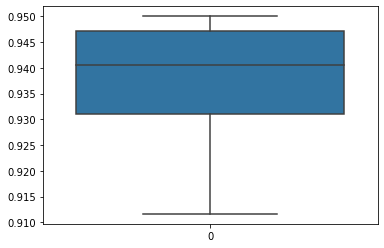

In [20]:
sns.boxplot(data=cat_df2['Cat R2 D1']);

In [21]:
combo = pd.concat([cat_df, cat_df2], axis=1)
combo.describe()

,Cat R2,test_neg_mae,Cat MAE,Cat R2 D1,test_neg_mae,Cat MAE D1
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.926502,-12139.006300,12139.006300,0.937368,-11892.797578,11892.797578
std,0.022830,765.977172,765.977172,0.011602,551.342041,551.342041
min,0.871938,-14130.293080,11287.420726,0.911637,-12772.976135,10840.053691
25%,0.924499,-12426.459622,11473.794913,0.931021,-12253.423538,11617.417535
50%,0.936854,-12174.770622,12174.770622,0.940612,-11990.466494,11990.466494
75%,0.940918,-11473.794913,12426.459622,0.947234,-11617.417535,12253.423538
max,0.950157,-11287.420726,14130.293080,0.950005,-10840.053691,12772.976135


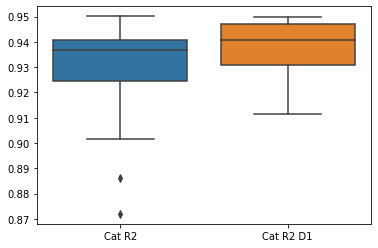

In [22]:
sns.boxplot(data=combo[['Cat R2', 'Cat R2 D1']]);

In [23]:
d2 = pd.read_csv('OrdinalDrop2.csv')
d2.shape

(2578, 83)

In [24]:
X = d2.drop(['SalePrice'], axis=1).values
y = d2.SalePrice.values

In [25]:
len(X)

2578

In [26]:
dfs = evaluate_model(CatBoostRegressor(), X, y)

718:	learn: 7716.1003320	total: 5.18s	remaining: 2.02s
719:	learn: 7703.8241379	total: 5.18s	remaining: 2.02s
720:	learn: 7703.1094106	total: 5.19s	remaining: 2.01s
721:	learn: 7696.6688496	total: 5.19s	remaining: 2s
722:	learn: 7685.6777353	total: 5.2s	remaining: 1.99s
723:	learn: 7672.9090419	total: 5.2s	remaining: 1.98s
724:	learn: 7665.6721058	total: 5.21s	remaining: 1.97s
725:	learn: 7655.5988658	total: 5.21s	remaining: 1.97s
726:	learn: 7647.0630794	total: 5.21s	remaining: 1.96s
727:	learn: 7638.1803028	total: 5.22s	remaining: 1.95s
728:	learn: 7627.9010728	total: 5.22s	remaining: 1.94s
729:	learn: 7617.9326222	total: 5.23s	remaining: 1.93s
730:	learn: 7608.9424658	total: 5.23s	remaining: 1.93s
731:	learn: 7598.6966284	total: 5.24s	remaining: 1.92s
732:	learn: 7589.3743743	total: 5.24s	remaining: 1.91s
733:	learn: 7578.5760630	total: 5.25s	remaining: 1.9s
734:	learn: 7570.7402271	total: 5.25s	remaining: 1.89s
735:	learn: 7561.3163692	total: 5.26s	remaining: 1.89s
736:	learn: 7551

828:	learn: 6704.3090465	total: 6.78s	remaining: 1.4s
829:	learn: 6703.8370508	total: 6.79s	remaining: 1.39s
830:	learn: 6699.4865906	total: 6.79s	remaining: 1.38s
831:	learn: 6689.4348498	total: 6.8s	remaining: 1.37s
832:	learn: 6681.4746114	total: 6.81s	remaining: 1.36s
833:	learn: 6675.2224168	total: 6.82s	remaining: 1.36s
834:	learn: 6664.2607444	total: 6.83s	remaining: 1.35s
835:	learn: 6656.0966785	total: 6.83s	remaining: 1.34s
836:	learn: 6651.8984992	total: 6.84s	remaining: 1.33s
837:	learn: 6644.3010208	total: 6.86s	remaining: 1.33s
838:	learn: 6636.7527509	total: 6.87s	remaining: 1.32s
839:	learn: 6630.0387498	total: 6.87s	remaining: 1.31s
840:	learn: 6621.5548240	total: 6.88s	remaining: 1.3s
841:	learn: 6613.2690956	total: 6.89s	remaining: 1.29s
842:	learn: 6607.3685594	total: 6.89s	remaining: 1.28s
843:	learn: 6601.4425723	total: 6.9s	remaining: 1.27s
844:	learn: 6599.1103210	total: 6.9s	remaining: 1.27s
845:	learn: 6590.7980994	total: 6.91s	remaining: 1.26s
846:	learn: 658

870:	learn: 6674.7904149	total: 4.17s	remaining: 617ms
871:	learn: 6671.3318937	total: 4.17s	remaining: 612ms
872:	learn: 6664.1871501	total: 4.17s	remaining: 607ms
873:	learn: 6658.5510389	total: 4.18s	remaining: 603ms
874:	learn: 6652.1068095	total: 4.18s	remaining: 598ms
875:	learn: 6645.8456781	total: 4.19s	remaining: 593ms
876:	learn: 6642.5331360	total: 4.19s	remaining: 588ms
877:	learn: 6630.1856216	total: 4.2s	remaining: 583ms
878:	learn: 6622.2303704	total: 4.2s	remaining: 579ms
879:	learn: 6611.9844178	total: 4.21s	remaining: 575ms
880:	learn: 6603.1247898	total: 4.22s	remaining: 570ms
881:	learn: 6593.9939164	total: 4.23s	remaining: 566ms
882:	learn: 6590.8940939	total: 4.24s	remaining: 562ms
883:	learn: 6586.2418050	total: 4.24s	remaining: 557ms
884:	learn: 6585.8743096	total: 4.25s	remaining: 552ms
885:	learn: 6578.8649806	total: 4.25s	remaining: 547ms
886:	learn: 6571.8828812	total: 4.26s	remaining: 542ms
887:	learn: 6563.7841373	total: 4.26s	remaining: 538ms
888:	learn: 

868:	learn: 6622.9954779	total: 5.81s	remaining: 876ms
869:	learn: 6617.8225804	total: 5.81s	remaining: 869ms
870:	learn: 6612.6936338	total: 5.82s	remaining: 862ms
871:	learn: 6611.6759230	total: 5.82s	remaining: 855ms
872:	learn: 6605.1954599	total: 5.83s	remaining: 847ms
873:	learn: 6597.2459397	total: 5.83s	remaining: 840ms
874:	learn: 6590.1952918	total: 5.83s	remaining: 833ms
875:	learn: 6584.8758721	total: 5.84s	remaining: 827ms
876:	learn: 6579.8480492	total: 5.84s	remaining: 820ms
877:	learn: 6573.8837736	total: 5.85s	remaining: 812ms
878:	learn: 6565.5991689	total: 5.85s	remaining: 806ms
879:	learn: 6556.7249374	total: 5.86s	remaining: 799ms
880:	learn: 6549.6458233	total: 5.86s	remaining: 792ms
881:	learn: 6549.2788978	total: 5.87s	remaining: 785ms
882:	learn: 6543.0908212	total: 5.87s	remaining: 778ms
883:	learn: 6535.6493319	total: 5.87s	remaining: 771ms
884:	learn: 6526.1972398	total: 5.88s	remaining: 764ms
885:	learn: 6520.4907468	total: 5.88s	remaining: 757ms
886:	learn

978:	learn: 5801.3169055	total: 8.41s	remaining: 181ms
979:	learn: 5794.7731013	total: 8.43s	remaining: 172ms
980:	learn: 5788.5656297	total: 8.43s	remaining: 163ms
981:	learn: 5786.1364553	total: 8.45s	remaining: 155ms
982:	learn: 5778.9056292	total: 8.46s	remaining: 146ms
983:	learn: 5772.8108862	total: 8.46s	remaining: 138ms
984:	learn: 5766.3266770	total: 8.47s	remaining: 129ms
985:	learn: 5760.2902857	total: 8.48s	remaining: 120ms
986:	learn: 5756.6920420	total: 8.49s	remaining: 112ms
987:	learn: 5750.4921876	total: 8.51s	remaining: 103ms
988:	learn: 5745.0425935	total: 8.51s	remaining: 94.7ms
989:	learn: 5742.6597830	total: 8.53s	remaining: 86.1ms
990:	learn: 5742.1073363	total: 8.53s	remaining: 77.5ms
991:	learn: 5735.3300035	total: 8.54s	remaining: 68.9ms
992:	learn: 5728.6239269	total: 8.55s	remaining: 60.2ms
993:	learn: 5728.4165350	total: 8.55s	remaining: 51.6ms
994:	learn: 5726.8972953	total: 8.57s	remaining: 43.1ms
995:	learn: 5719.7996495	total: 8.59s	remaining: 34.5ms
99

20:	learn: 42573.4047456	total: 131ms	remaining: 6.1s
21:	learn: 41632.5695489	total: 141ms	remaining: 6.28s
22:	learn: 40675.3688223	total: 147ms	remaining: 6.24s
23:	learn: 39772.2247284	total: 151ms	remaining: 6.15s
24:	learn: 38873.2768939	total: 159ms	remaining: 6.2s
25:	learn: 37974.4404932	total: 169ms	remaining: 6.32s
26:	learn: 37182.1540077	total: 179ms	remaining: 6.44s
27:	learn: 36346.5717719	total: 184ms	remaining: 6.38s
28:	learn: 35629.2779707	total: 193ms	remaining: 6.45s
29:	learn: 34910.3725403	total: 197ms	remaining: 6.38s
30:	learn: 34226.5257994	total: 207ms	remaining: 6.47s
31:	learn: 33608.0016220	total: 218ms	remaining: 6.6s
32:	learn: 32992.4180678	total: 226ms	remaining: 6.62s
33:	learn: 32397.4134311	total: 230ms	remaining: 6.54s
34:	learn: 31824.1315794	total: 235ms	remaining: 6.47s
35:	learn: 31307.0395791	total: 241ms	remaining: 6.46s
36:	learn: 30806.4651539	total: 246ms	remaining: 6.4s
37:	learn: 30256.1006786	total: 251ms	remaining: 6.37s
38:	learn: 297

130:	learn: 17118.2825248	total: 1.19s	remaining: 7.88s
131:	learn: 17089.4419429	total: 1.19s	remaining: 7.85s
132:	learn: 17055.4706726	total: 1.2s	remaining: 7.85s
133:	learn: 17017.2434675	total: 1.22s	remaining: 7.89s
134:	learn: 16967.1425939	total: 1.23s	remaining: 7.88s
135:	learn: 16932.0008844	total: 1.24s	remaining: 7.85s
136:	learn: 16897.6031734	total: 1.24s	remaining: 7.82s
137:	learn: 16869.2278322	total: 1.25s	remaining: 7.81s
138:	learn: 16828.9992723	total: 1.25s	remaining: 7.78s
139:	learn: 16803.0013215	total: 1.27s	remaining: 7.82s
140:	learn: 16741.1877747	total: 1.28s	remaining: 7.8s
141:	learn: 16699.0959272	total: 1.29s	remaining: 7.78s
142:	learn: 16648.9458107	total: 1.29s	remaining: 7.75s
143:	learn: 16610.5539432	total: 1.31s	remaining: 7.78s
144:	learn: 16572.3880761	total: 1.32s	remaining: 7.76s
145:	learn: 16541.9456913	total: 1.32s	remaining: 7.75s
146:	learn: 16505.4435602	total: 1.33s	remaining: 7.73s
147:	learn: 16475.2623132	total: 1.34s	remaining: 

127:	learn: 17059.1088692	total: 993ms	remaining: 6.77s
128:	learn: 17011.4613490	total: 1s	remaining: 6.77s
129:	learn: 16985.2780092	total: 1.01s	remaining: 6.76s
130:	learn: 16954.3107158	total: 1.01s	remaining: 6.73s
131:	learn: 16922.3329286	total: 1.02s	remaining: 6.71s
132:	learn: 16890.0841410	total: 1.03s	remaining: 6.71s
133:	learn: 16860.7407999	total: 1.03s	remaining: 6.68s
134:	learn: 16813.6651145	total: 1.05s	remaining: 6.71s
135:	learn: 16779.7516727	total: 1.05s	remaining: 6.7s
136:	learn: 16725.9399200	total: 1.06s	remaining: 6.69s
137:	learn: 16680.3280092	total: 1.07s	remaining: 6.69s
138:	learn: 16644.6071975	total: 1.09s	remaining: 6.74s
139:	learn: 16584.7795976	total: 1.09s	remaining: 6.71s
140:	learn: 16521.8914314	total: 1.1s	remaining: 6.73s
141:	learn: 16475.7577707	total: 1.11s	remaining: 6.72s
142:	learn: 16423.9432967	total: 1.12s	remaining: 6.7s
143:	learn: 16400.3774712	total: 1.12s	remaining: 6.68s
144:	learn: 16373.0585926	total: 1.13s	remaining: 6.65

126:	learn: 17468.2760970	total: 1.01s	remaining: 6.96s
127:	learn: 17428.1450084	total: 1.02s	remaining: 6.94s
128:	learn: 17385.7235073	total: 1.02s	remaining: 6.91s
129:	learn: 17340.4627968	total: 1.03s	remaining: 6.87s
130:	learn: 17308.2548037	total: 1.03s	remaining: 6.87s
131:	learn: 17255.6081057	total: 1.04s	remaining: 6.85s
132:	learn: 17224.5494275	total: 1.05s	remaining: 6.84s
133:	learn: 17195.3486630	total: 1.05s	remaining: 6.82s
134:	learn: 17163.3520280	total: 1.06s	remaining: 6.79s
135:	learn: 17138.2449960	total: 1.06s	remaining: 6.77s
136:	learn: 17079.3504944	total: 1.07s	remaining: 6.75s
137:	learn: 17049.8760978	total: 1.08s	remaining: 6.72s
138:	learn: 17012.8934916	total: 1.08s	remaining: 6.71s
139:	learn: 16989.6447393	total: 1.09s	remaining: 6.71s
140:	learn: 16938.3783402	total: 1.1s	remaining: 6.68s
141:	learn: 16902.7534815	total: 1.1s	remaining: 6.68s
142:	learn: 16879.6919051	total: 1.11s	remaining: 6.65s
143:	learn: 16845.1584493	total: 1.12s	remaining: 

168:	learn: 15676.7403778	total: 1.3s	remaining: 6.42s
169:	learn: 15643.0303543	total: 1.31s	remaining: 6.42s
170:	learn: 15610.7070547	total: 1.32s	remaining: 6.42s
171:	learn: 15569.1668847	total: 1.33s	remaining: 6.42s
172:	learn: 15524.2295571	total: 1.34s	remaining: 6.43s
173:	learn: 15497.2086314	total: 1.35s	remaining: 6.42s
174:	learn: 15451.6087794	total: 1.37s	remaining: 6.44s
175:	learn: 15411.3063866	total: 1.37s	remaining: 6.43s
176:	learn: 15378.5688015	total: 1.38s	remaining: 6.43s
177:	learn: 15339.2455981	total: 1.39s	remaining: 6.42s
178:	learn: 15300.1049400	total: 1.4s	remaining: 6.41s
179:	learn: 15260.4135157	total: 1.4s	remaining: 6.4s
180:	learn: 15210.6153468	total: 1.42s	remaining: 6.41s
181:	learn: 15169.5765705	total: 1.42s	remaining: 6.39s
182:	learn: 15127.8877700	total: 1.43s	remaining: 6.38s
183:	learn: 15091.5955679	total: 1.44s	remaining: 6.41s
184:	learn: 15057.9485526	total: 1.45s	remaining: 6.4s
185:	learn: 15021.2240824	total: 1.46s	remaining: 6.3

166:	learn: 15309.2903974	total: 1.46s	remaining: 7.28s
167:	learn: 15290.6525838	total: 1.47s	remaining: 7.3s
168:	learn: 15260.2914162	total: 1.48s	remaining: 7.29s
169:	learn: 15231.8953208	total: 1.49s	remaining: 7.28s
170:	learn: 15195.4666161	total: 1.5s	remaining: 7.27s
171:	learn: 15172.7843972	total: 1.51s	remaining: 7.25s
172:	learn: 15139.2296271	total: 1.51s	remaining: 7.24s
173:	learn: 15116.2360742	total: 1.52s	remaining: 7.21s
174:	learn: 15078.2455796	total: 1.53s	remaining: 7.21s
175:	learn: 15040.8712469	total: 1.54s	remaining: 7.19s
176:	learn: 14999.2643176	total: 1.54s	remaining: 7.18s
177:	learn: 14982.5216791	total: 1.55s	remaining: 7.16s
178:	learn: 14945.0002678	total: 1.55s	remaining: 7.13s
179:	learn: 14910.8556803	total: 1.56s	remaining: 7.1s
180:	learn: 14872.9728614	total: 1.57s	remaining: 7.09s
181:	learn: 14843.6241601	total: 1.58s	remaining: 7.1s
182:	learn: 14809.5245042	total: 1.59s	remaining: 7.09s
183:	learn: 14792.1191068	total: 1.59s	remaining: 7.

274:	learn: 12715.4714084	total: 2.18s	remaining: 5.74s
275:	learn: 12703.7320323	total: 2.18s	remaining: 5.73s
276:	learn: 12682.2383634	total: 2.19s	remaining: 5.72s
277:	learn: 12667.1832348	total: 2.2s	remaining: 5.71s
278:	learn: 12650.0157475	total: 2.21s	remaining: 5.7s
279:	learn: 12634.0942235	total: 2.21s	remaining: 5.68s
280:	learn: 12608.2887035	total: 2.21s	remaining: 5.67s
281:	learn: 12590.8866329	total: 2.22s	remaining: 5.65s
282:	learn: 12571.3908733	total: 2.23s	remaining: 5.66s
283:	learn: 12561.8387541	total: 2.24s	remaining: 5.64s
284:	learn: 12537.4152565	total: 2.25s	remaining: 5.64s
285:	learn: 12522.6981989	total: 2.25s	remaining: 5.62s
286:	learn: 12516.5881005	total: 2.26s	remaining: 5.61s
287:	learn: 12495.1945376	total: 2.26s	remaining: 5.6s
288:	learn: 12476.0975793	total: 2.27s	remaining: 5.58s
289:	learn: 12455.8080341	total: 2.27s	remaining: 5.57s
290:	learn: 12441.3121886	total: 2.28s	remaining: 5.55s
291:	learn: 12423.7600886	total: 2.29s	remaining: 5

311:	learn: 12207.2228418	total: 2.34s	remaining: 5.16s
312:	learn: 12184.5970564	total: 2.34s	remaining: 5.15s
313:	learn: 12163.6829681	total: 2.35s	remaining: 5.13s
314:	learn: 12134.7124757	total: 2.35s	remaining: 5.12s
315:	learn: 12129.4522554	total: 2.36s	remaining: 5.11s
316:	learn: 12106.3807684	total: 2.37s	remaining: 5.11s
317:	learn: 12096.9048896	total: 2.38s	remaining: 5.09s
318:	learn: 12078.0097970	total: 2.38s	remaining: 5.08s
319:	learn: 12051.5793608	total: 2.38s	remaining: 5.07s
320:	learn: 12035.4603559	total: 2.4s	remaining: 5.07s
321:	learn: 12011.7252633	total: 2.41s	remaining: 5.07s
322:	learn: 11983.4551524	total: 2.41s	remaining: 5.06s
323:	learn: 11960.4552638	total: 2.42s	remaining: 5.05s
324:	learn: 11941.6963148	total: 2.42s	remaining: 5.04s
325:	learn: 11929.9303369	total: 2.44s	remaining: 5.03s
326:	learn: 11904.9601370	total: 2.44s	remaining: 5.02s
327:	learn: 11882.0657594	total: 2.44s	remaining: 5.01s
328:	learn: 11876.8183836	total: 2.45s	remaining:

273:	learn: 13181.4341031	total: 2.24s	remaining: 5.94s
274:	learn: 13164.8578959	total: 2.26s	remaining: 5.95s
275:	learn: 13140.3950891	total: 2.27s	remaining: 5.96s
276:	learn: 13112.2989081	total: 2.28s	remaining: 5.94s
277:	learn: 13091.4170543	total: 2.29s	remaining: 5.94s
278:	learn: 13072.6408329	total: 2.3s	remaining: 5.95s
279:	learn: 13052.6827277	total: 2.31s	remaining: 5.94s
280:	learn: 13032.3576140	total: 2.32s	remaining: 5.94s
281:	learn: 13010.0982225	total: 2.33s	remaining: 5.92s
282:	learn: 12994.9992971	total: 2.33s	remaining: 5.9s
283:	learn: 12968.0290071	total: 2.34s	remaining: 5.89s
284:	learn: 12958.9977052	total: 2.35s	remaining: 5.91s
285:	learn: 12937.0836407	total: 2.36s	remaining: 5.9s
286:	learn: 12910.7329729	total: 2.37s	remaining: 5.9s
287:	learn: 12896.7658786	total: 2.39s	remaining: 5.91s
288:	learn: 12877.8950943	total: 2.4s	remaining: 5.91s
289:	learn: 12865.4897656	total: 2.41s	remaining: 5.89s
290:	learn: 12834.8116953	total: 2.41s	remaining: 5.8

314:	learn: 11909.2355044	total: 2.69s	remaining: 5.86s
315:	learn: 11887.4589556	total: 2.71s	remaining: 5.86s
316:	learn: 11884.0863253	total: 2.73s	remaining: 5.88s
317:	learn: 11871.0043741	total: 2.74s	remaining: 5.88s
318:	learn: 11857.2607909	total: 2.75s	remaining: 5.87s
319:	learn: 11836.6896800	total: 2.76s	remaining: 5.87s
320:	learn: 11811.3876261	total: 2.77s	remaining: 5.86s
321:	learn: 11801.5841486	total: 2.78s	remaining: 5.85s
322:	learn: 11795.3169169	total: 2.79s	remaining: 5.84s
323:	learn: 11775.5978153	total: 2.79s	remaining: 5.82s
324:	learn: 11755.4794205	total: 2.79s	remaining: 5.8s
325:	learn: 11732.1504774	total: 2.8s	remaining: 5.79s
326:	learn: 11711.8016350	total: 2.82s	remaining: 5.8s
327:	learn: 11693.7236764	total: 2.83s	remaining: 5.79s
328:	learn: 11671.3771488	total: 2.85s	remaining: 5.8s
329:	learn: 11652.3658595	total: 2.86s	remaining: 5.8s
330:	learn: 11640.7996602	total: 2.86s	remaining: 5.79s
331:	learn: 11615.9411943	total: 2.87s	remaining: 5.7

463:	learn: 9581.0801347	total: 3.46s	remaining: 4s
464:	learn: 9568.7243557	total: 3.47s	remaining: 3.99s
465:	learn: 9558.2472922	total: 3.48s	remaining: 3.98s
466:	learn: 9542.4770069	total: 3.48s	remaining: 3.98s
467:	learn: 9524.1059506	total: 3.49s	remaining: 3.97s
468:	learn: 9516.8567466	total: 3.49s	remaining: 3.96s
469:	learn: 9499.3371337	total: 3.5s	remaining: 3.94s
470:	learn: 9497.3003585	total: 3.5s	remaining: 3.93s
471:	learn: 9486.8202878	total: 3.51s	remaining: 3.92s
472:	learn: 9482.8959280	total: 3.52s	remaining: 3.92s
473:	learn: 9467.4251973	total: 3.52s	remaining: 3.91s
474:	learn: 9446.9162363	total: 3.53s	remaining: 3.9s
475:	learn: 9438.5668318	total: 3.53s	remaining: 3.89s
476:	learn: 9429.1960377	total: 3.54s	remaining: 3.88s
477:	learn: 9412.5503785	total: 3.54s	remaining: 3.87s
478:	learn: 9394.2313360	total: 3.55s	remaining: 3.87s
479:	learn: 9383.2563182	total: 3.56s	remaining: 3.86s
480:	learn: 9371.7963114	total: 3.57s	remaining: 3.85s
481:	learn: 9359

458:	learn: 10016.3797201	total: 3.39s	remaining: 4s
459:	learn: 9995.1023761	total: 3.4s	remaining: 3.99s
460:	learn: 9981.2496198	total: 3.4s	remaining: 3.98s
461:	learn: 9968.2468773	total: 3.42s	remaining: 3.98s
462:	learn: 9953.4958823	total: 3.42s	remaining: 3.97s
463:	learn: 9943.0476211	total: 3.43s	remaining: 3.96s
464:	learn: 9934.8261330	total: 3.43s	remaining: 3.95s
465:	learn: 9926.9265537	total: 3.44s	remaining: 3.94s
466:	learn: 9911.6983647	total: 3.44s	remaining: 3.93s
467:	learn: 9898.2012871	total: 3.45s	remaining: 3.92s
468:	learn: 9887.3218289	total: 3.45s	remaining: 3.91s
469:	learn: 9876.0157390	total: 3.46s	remaining: 3.9s
470:	learn: 9858.1439487	total: 3.46s	remaining: 3.89s
471:	learn: 9848.8669919	total: 3.47s	remaining: 3.88s
472:	learn: 9846.7014850	total: 3.47s	remaining: 3.87s
473:	learn: 9832.5751056	total: 3.48s	remaining: 3.86s
474:	learn: 9818.7624365	total: 3.48s	remaining: 3.85s
475:	learn: 9813.8801381	total: 3.49s	remaining: 3.84s
476:	learn: 979

420:	learn: 10724.2775342	total: 3.38s	remaining: 4.65s
421:	learn: 10712.3110483	total: 3.39s	remaining: 4.64s
422:	learn: 10700.8952618	total: 3.39s	remaining: 4.63s
423:	learn: 10691.5608417	total: 3.4s	remaining: 4.61s
424:	learn: 10674.3526861	total: 3.41s	remaining: 4.61s
425:	learn: 10661.4060587	total: 3.41s	remaining: 4.6s
426:	learn: 10649.6865230	total: 3.42s	remaining: 4.59s
427:	learn: 10648.0587357	total: 3.42s	remaining: 4.58s
428:	learn: 10643.5606515	total: 3.43s	remaining: 4.56s
429:	learn: 10628.6911137	total: 3.43s	remaining: 4.55s
430:	learn: 10612.6045247	total: 3.44s	remaining: 4.54s
431:	learn: 10603.2415419	total: 3.44s	remaining: 4.53s
432:	learn: 10587.3386384	total: 3.45s	remaining: 4.52s
433:	learn: 10570.4847325	total: 3.46s	remaining: 4.51s
434:	learn: 10557.7680953	total: 3.47s	remaining: 4.5s
435:	learn: 10553.1132557	total: 3.47s	remaining: 4.49s
436:	learn: 10532.1603799	total: 3.48s	remaining: 4.48s
437:	learn: 10515.5669533	total: 3.48s	remaining: 4

613:	learn: 8090.6351346	total: 4.4s	remaining: 2.77s
614:	learn: 8078.9769875	total: 4.41s	remaining: 2.76s
615:	learn: 8069.7721237	total: 4.41s	remaining: 2.75s
616:	learn: 8064.2961687	total: 4.42s	remaining: 2.74s
617:	learn: 8053.9188010	total: 4.42s	remaining: 2.73s
618:	learn: 8041.7171640	total: 4.43s	remaining: 2.73s
619:	learn: 8031.9358324	total: 4.43s	remaining: 2.72s
620:	learn: 8025.6976011	total: 4.44s	remaining: 2.71s
621:	learn: 8011.0883948	total: 4.44s	remaining: 2.7s
622:	learn: 7999.1145433	total: 4.45s	remaining: 2.69s
623:	learn: 7989.9496889	total: 4.46s	remaining: 2.69s
624:	learn: 7978.9820544	total: 4.46s	remaining: 2.68s
625:	learn: 7977.6993789	total: 4.46s	remaining: 2.67s
626:	learn: 7971.7324541	total: 4.47s	remaining: 2.66s
627:	learn: 7964.8975035	total: 4.48s	remaining: 2.65s
628:	learn: 7954.4458917	total: 4.48s	remaining: 2.65s
629:	learn: 7944.2682916	total: 4.49s	remaining: 2.64s
630:	learn: 7942.1762852	total: 4.5s	remaining: 2.63s
631:	learn: 7

608:	learn: 8478.5342576	total: 4.57s	remaining: 2.93s
609:	learn: 8467.0615874	total: 4.58s	remaining: 2.93s
610:	learn: 8457.3587299	total: 4.58s	remaining: 2.92s
611:	learn: 8455.8207039	total: 4.59s	remaining: 2.91s
612:	learn: 8439.0431945	total: 4.6s	remaining: 2.9s
613:	learn: 8432.2532800	total: 4.6s	remaining: 2.89s
614:	learn: 8425.3474144	total: 4.61s	remaining: 2.88s
615:	learn: 8423.1535733	total: 4.61s	remaining: 2.87s
616:	learn: 8414.1638182	total: 4.62s	remaining: 2.87s
617:	learn: 8395.6580903	total: 4.62s	remaining: 2.86s
618:	learn: 8386.1076552	total: 4.63s	remaining: 2.85s
619:	learn: 8372.1182261	total: 4.63s	remaining: 2.84s
620:	learn: 8362.3600261	total: 4.64s	remaining: 2.83s
621:	learn: 8353.5677060	total: 4.64s	remaining: 2.82s
622:	learn: 8346.9141693	total: 4.65s	remaining: 2.81s
623:	learn: 8337.9553690	total: 4.66s	remaining: 2.81s
624:	learn: 8330.9982017	total: 4.66s	remaining: 2.8s
625:	learn: 8321.1057331	total: 4.67s	remaining: 2.79s
626:	learn: 83

612:	learn: 8140.9860558	total: 5.01s	remaining: 3.17s
613:	learn: 8136.7676119	total: 5.02s	remaining: 3.16s
614:	learn: 8127.9762027	total: 5.03s	remaining: 3.15s
615:	learn: 8126.3390431	total: 5.04s	remaining: 3.14s
616:	learn: 8118.3303033	total: 5.04s	remaining: 3.13s
617:	learn: 8108.9823598	total: 5.04s	remaining: 3.12s
618:	learn: 8103.4983701	total: 5.05s	remaining: 3.11s
619:	learn: 8096.1206969	total: 5.05s	remaining: 3.1s
620:	learn: 8083.6748323	total: 5.07s	remaining: 3.09s
621:	learn: 8077.8157867	total: 5.08s	remaining: 3.09s
622:	learn: 8068.6532842	total: 5.08s	remaining: 3.08s
623:	learn: 8062.1981839	total: 5.09s	remaining: 3.07s
624:	learn: 8051.5829824	total: 5.09s	remaining: 3.06s
625:	learn: 8042.7033080	total: 5.1s	remaining: 3.05s
626:	learn: 8028.6961527	total: 5.11s	remaining: 3.04s
627:	learn: 8019.6332486	total: 5.11s	remaining: 3.03s
628:	learn: 8010.3709746	total: 5.11s	remaining: 3.02s
629:	learn: 7997.3052481	total: 5.12s	remaining: 3.01s
630:	learn: 

614:	learn: 8139.9418245	total: 4.95s	remaining: 3.1s
615:	learn: 8134.1383467	total: 4.97s	remaining: 3.1s
616:	learn: 8124.1135818	total: 5s	remaining: 3.1s
617:	learn: 8117.4356116	total: 5.03s	remaining: 3.11s
618:	learn: 8110.2357458	total: 5.04s	remaining: 3.1s
619:	learn: 8101.4699773	total: 5.06s	remaining: 3.1s
620:	learn: 8089.1064615	total: 5.06s	remaining: 3.09s
621:	learn: 8078.4987213	total: 5.07s	remaining: 3.08s
622:	learn: 8066.3642418	total: 5.08s	remaining: 3.07s
623:	learn: 8056.1793022	total: 5.09s	remaining: 3.07s
624:	learn: 8048.8549551	total: 5.1s	remaining: 3.06s
625:	learn: 8034.8352005	total: 5.11s	remaining: 3.05s
626:	learn: 8026.8411336	total: 5.12s	remaining: 3.04s
627:	learn: 8022.2024054	total: 5.13s	remaining: 3.04s
628:	learn: 8013.9022625	total: 5.14s	remaining: 3.03s
629:	learn: 8005.3007375	total: 5.14s	remaining: 3.02s
630:	learn: 7998.8363552	total: 5.15s	remaining: 3.01s
631:	learn: 7987.7803472	total: 5.16s	remaining: 3.01s
632:	learn: 7978.70

763:	learn: 6940.2704926	total: 5.32s	remaining: 1.64s
764:	learn: 6933.3810367	total: 5.33s	remaining: 1.64s
765:	learn: 6924.2125633	total: 5.34s	remaining: 1.63s
766:	learn: 6915.2861804	total: 5.35s	remaining: 1.62s
767:	learn: 6908.3810902	total: 5.36s	remaining: 1.62s
768:	learn: 6898.6196429	total: 5.36s	remaining: 1.61s
769:	learn: 6897.5385652	total: 5.37s	remaining: 1.6s
770:	learn: 6891.6202119	total: 5.38s	remaining: 1.6s
771:	learn: 6884.6002630	total: 5.38s	remaining: 1.59s
772:	learn: 6872.8077900	total: 5.39s	remaining: 1.58s
773:	learn: 6866.1508736	total: 5.4s	remaining: 1.58s
774:	learn: 6865.6204247	total: 5.4s	remaining: 1.57s
775:	learn: 6859.2599615	total: 5.41s	remaining: 1.56s
776:	learn: 6849.3917725	total: 5.41s	remaining: 1.55s
777:	learn: 6840.1319626	total: 5.42s	remaining: 1.54s
778:	learn: 6828.9586642	total: 5.42s	remaining: 1.54s
779:	learn: 6817.3459840	total: 5.43s	remaining: 1.53s
780:	learn: 6805.1626873	total: 5.44s	remaining: 1.52s
781:	learn: 67

758:	learn: 7186.6843716	total: 5.58s	remaining: 1.77s
759:	learn: 7178.7586317	total: 5.59s	remaining: 1.77s
760:	learn: 7169.4704387	total: 5.6s	remaining: 1.76s
761:	learn: 7163.2626369	total: 5.61s	remaining: 1.75s
762:	learn: 7155.0991691	total: 5.62s	remaining: 1.74s
763:	learn: 7145.6613588	total: 5.62s	remaining: 1.74s
764:	learn: 7139.7560453	total: 5.63s	remaining: 1.73s
765:	learn: 7132.1753296	total: 5.64s	remaining: 1.72s
766:	learn: 7126.9789600	total: 5.64s	remaining: 1.71s
767:	learn: 7121.2347228	total: 5.65s	remaining: 1.71s
768:	learn: 7112.0532622	total: 5.66s	remaining: 1.7s
769:	learn: 7106.9525754	total: 5.67s	remaining: 1.69s
770:	learn: 7103.4794442	total: 5.68s	remaining: 1.69s
771:	learn: 7093.0627447	total: 5.69s	remaining: 1.68s
772:	learn: 7090.9348205	total: 5.69s	remaining: 1.67s
773:	learn: 7080.0805039	total: 5.7s	remaining: 1.66s
774:	learn: 7071.5584539	total: 5.7s	remaining: 1.66s
775:	learn: 7061.8873555	total: 5.71s	remaining: 1.65s
776:	learn: 70

719:	learn: 7872.9165857	total: 5.99s	remaining: 2.33s
720:	learn: 7872.2805288	total: 6s	remaining: 2.32s
721:	learn: 7865.1789711	total: 6s	remaining: 2.31s
722:	learn: 7859.5525619	total: 6s	remaining: 2.3s
723:	learn: 7851.0297139	total: 6.01s	remaining: 2.29s
724:	learn: 7843.0700572	total: 6.02s	remaining: 2.28s
725:	learn: 7827.1846304	total: 6.02s	remaining: 2.27s
726:	learn: 7820.9790734	total: 6.03s	remaining: 2.26s
727:	learn: 7815.1980726	total: 6.03s	remaining: 2.25s
728:	learn: 7809.5096123	total: 6.04s	remaining: 2.24s
729:	learn: 7797.8721778	total: 6.04s	remaining: 2.23s
730:	learn: 7786.9110033	total: 6.05s	remaining: 2.23s
731:	learn: 7782.4446051	total: 6.05s	remaining: 2.22s
732:	learn: 7772.5619105	total: 6.06s	remaining: 2.21s
733:	learn: 7759.3348074	total: 6.06s	remaining: 2.2s
734:	learn: 7751.4659627	total: 6.07s	remaining: 2.19s
735:	learn: 7743.4313897	total: 6.08s	remaining: 2.18s
736:	learn: 7741.4047307	total: 6.08s	remaining: 2.17s
737:	learn: 7735.5365

764:	learn: 6979.6762606	total: 6.14s	remaining: 1.89s
765:	learn: 6971.0473687	total: 6.14s	remaining: 1.88s
766:	learn: 6966.0283484	total: 6.15s	remaining: 1.87s
767:	learn: 6957.1922404	total: 6.16s	remaining: 1.86s
768:	learn: 6953.1448840	total: 6.17s	remaining: 1.85s
769:	learn: 6940.6344248	total: 6.18s	remaining: 1.85s
770:	learn: 6935.3850880	total: 6.19s	remaining: 1.84s
771:	learn: 6931.3638977	total: 6.2s	remaining: 1.83s
772:	learn: 6924.7562588	total: 6.2s	remaining: 1.82s
773:	learn: 6916.3763514	total: 6.21s	remaining: 1.81s
774:	learn: 6915.6756486	total: 6.22s	remaining: 1.81s
775:	learn: 6908.7188449	total: 6.23s	remaining: 1.8s
776:	learn: 6904.5541245	total: 6.24s	remaining: 1.79s
777:	learn: 6894.0188259	total: 6.25s	remaining: 1.78s
778:	learn: 6887.1605568	total: 6.25s	remaining: 1.77s
779:	learn: 6882.1064446	total: 6.26s	remaining: 1.76s
780:	learn: 6873.6590468	total: 6.26s	remaining: 1.76s
781:	learn: 6865.5715234	total: 6.27s	remaining: 1.75s
782:	learn: 6

870:	learn: 6502.7069892	total: 6.13s	remaining: 907ms
871:	learn: 6500.7220192	total: 6.13s	remaining: 900ms
872:	learn: 6494.2534868	total: 6.14s	remaining: 894ms
873:	learn: 6491.5570253	total: 6.15s	remaining: 887ms
874:	learn: 6483.1632983	total: 6.16s	remaining: 881ms
875:	learn: 6477.9174119	total: 6.17s	remaining: 873ms
876:	learn: 6472.5444311	total: 6.18s	remaining: 866ms
877:	learn: 6467.8565050	total: 6.18s	remaining: 859ms
878:	learn: 6457.9940434	total: 6.19s	remaining: 852ms
879:	learn: 6449.3529838	total: 6.2s	remaining: 846ms
880:	learn: 6447.9418217	total: 6.22s	remaining: 840ms
881:	learn: 6441.1138955	total: 6.22s	remaining: 833ms
882:	learn: 6440.4301656	total: 6.23s	remaining: 825ms
883:	learn: 6434.3247832	total: 6.24s	remaining: 818ms
884:	learn: 6431.3705585	total: 6.25s	remaining: 812ms
885:	learn: 6423.6794096	total: 6.26s	remaining: 805ms
886:	learn: 6419.0727910	total: 6.26s	remaining: 798ms
887:	learn: 6414.6615045	total: 6.27s	remaining: 791ms
888:	learn:

912:	learn: 6016.4684983	total: 7s	remaining: 668ms
913:	learn: 6007.9843181	total: 7.01s	remaining: 660ms
914:	learn: 5999.8064541	total: 7.01s	remaining: 652ms
915:	learn: 5994.4025386	total: 7.02s	remaining: 644ms
916:	learn: 5989.1603704	total: 7.03s	remaining: 636ms
917:	learn: 5984.8917251	total: 7.04s	remaining: 628ms
918:	learn: 5979.9588064	total: 7.04s	remaining: 621ms
919:	learn: 5974.8422534	total: 7.05s	remaining: 613ms
920:	learn: 5970.0128625	total: 7.05s	remaining: 605ms
921:	learn: 5963.2272889	total: 7.06s	remaining: 598ms
922:	learn: 5958.3758578	total: 7.07s	remaining: 590ms
923:	learn: 5953.0063182	total: 7.08s	remaining: 582ms
924:	learn: 5948.0018789	total: 7.09s	remaining: 575ms
925:	learn: 5942.7342702	total: 7.1s	remaining: 567ms
926:	learn: 5937.1290755	total: 7.1s	remaining: 559ms
927:	learn: 5936.2570129	total: 7.11s	remaining: 551ms
928:	learn: 5930.4704863	total: 7.11s	remaining: 544ms
929:	learn: 5926.2272607	total: 7.12s	remaining: 536ms
930:	learn: 592

914:	learn: 6102.4626158	total: 7.23s	remaining: 672ms
915:	learn: 6097.3937128	total: 7.23s	remaining: 663ms
916:	learn: 6089.7051105	total: 7.24s	remaining: 655ms
917:	learn: 6080.6155001	total: 7.25s	remaining: 647ms
918:	learn: 6074.7454109	total: 7.25s	remaining: 639ms
919:	learn: 6068.8979994	total: 7.25s	remaining: 631ms
920:	learn: 6059.2031681	total: 7.26s	remaining: 623ms
921:	learn: 6052.2184540	total: 7.26s	remaining: 615ms
922:	learn: 6047.0061747	total: 7.27s	remaining: 606ms
923:	learn: 6040.4878483	total: 7.27s	remaining: 598ms
924:	learn: 6031.4777990	total: 7.28s	remaining: 590ms
925:	learn: 6030.2466783	total: 7.29s	remaining: 582ms
926:	learn: 6021.2270822	total: 7.29s	remaining: 574ms
927:	learn: 6017.8944233	total: 7.3s	remaining: 566ms
928:	learn: 6011.1494978	total: 7.3s	remaining: 558ms
929:	learn: 6002.7712177	total: 7.31s	remaining: 550ms
930:	learn: 5998.2534686	total: 7.32s	remaining: 543ms
931:	learn: 5992.7494729	total: 7.33s	remaining: 535ms
932:	learn: 

57:	learn: 23464.4011975	total: 391ms	remaining: 6.34s
58:	learn: 23283.8604715	total: 397ms	remaining: 6.32s
59:	learn: 23086.4294988	total: 400ms	remaining: 6.27s
60:	learn: 22903.5297259	total: 406ms	remaining: 6.26s
61:	learn: 22738.5352002	total: 411ms	remaining: 6.22s
62:	learn: 22556.6823547	total: 415ms	remaining: 6.17s
63:	learn: 22391.0632116	total: 424ms	remaining: 6.2s
64:	learn: 22230.3701490	total: 435ms	remaining: 6.26s
65:	learn: 22080.1654434	total: 439ms	remaining: 6.21s
66:	learn: 21950.3792918	total: 446ms	remaining: 6.21s
67:	learn: 21782.0375918	total: 454ms	remaining: 6.22s
68:	learn: 21615.6724965	total: 461ms	remaining: 6.22s
69:	learn: 21484.8980003	total: 466ms	remaining: 6.18s
70:	learn: 21364.4441208	total: 471ms	remaining: 6.16s
71:	learn: 21250.7352158	total: 475ms	remaining: 6.13s
72:	learn: 21136.4187808	total: 482ms	remaining: 6.11s
73:	learn: 20995.6203559	total: 490ms	remaining: 6.13s
74:	learn: 20862.6076825	total: 495ms	remaining: 6.1s
75:	learn: 2

18:	learn: 44339.0792918	total: 133ms	remaining: 6.86s
19:	learn: 43260.5909827	total: 137ms	remaining: 6.73s
20:	learn: 42229.0542903	total: 143ms	remaining: 6.67s
21:	learn: 41277.5136209	total: 148ms	remaining: 6.58s
22:	learn: 40400.4483636	total: 157ms	remaining: 6.65s
23:	learn: 39566.2899624	total: 161ms	remaining: 6.57s
24:	learn: 38633.0536164	total: 167ms	remaining: 6.49s
25:	learn: 37778.7052337	total: 171ms	remaining: 6.4s
26:	learn: 37051.7785820	total: 176ms	remaining: 6.34s
27:	learn: 36300.9034778	total: 180ms	remaining: 6.26s
28:	learn: 35543.5171666	total: 187ms	remaining: 6.27s
29:	learn: 34859.5899349	total: 192ms	remaining: 6.2s
30:	learn: 34119.0564919	total: 197ms	remaining: 6.16s
31:	learn: 33495.2111242	total: 204ms	remaining: 6.17s
32:	learn: 32861.8491414	total: 212ms	remaining: 6.2s
33:	learn: 32346.4359460	total: 218ms	remaining: 6.19s
34:	learn: 31754.1699344	total: 228ms	remaining: 6.28s
35:	learn: 31254.4208870	total: 232ms	remaining: 6.2s
36:	learn: 308

61:	learn: 22593.1756609	total: 413ms	remaining: 6.25s
62:	learn: 22390.1402504	total: 417ms	remaining: 6.2s
63:	learn: 22208.2074796	total: 421ms	remaining: 6.16s
64:	learn: 22051.9181874	total: 431ms	remaining: 6.2s
65:	learn: 21901.5349786	total: 440ms	remaining: 6.22s
66:	learn: 21749.5380523	total: 447ms	remaining: 6.22s
67:	learn: 21583.7284858	total: 451ms	remaining: 6.18s
68:	learn: 21404.2479873	total: 458ms	remaining: 6.17s
69:	learn: 21259.4099159	total: 465ms	remaining: 6.18s
70:	learn: 21136.6097027	total: 470ms	remaining: 6.15s
71:	learn: 21008.0588428	total: 478ms	remaining: 6.16s
72:	learn: 20896.4633427	total: 486ms	remaining: 6.17s
73:	learn: 20778.8082804	total: 490ms	remaining: 6.13s
74:	learn: 20646.9834214	total: 495ms	remaining: 6.11s
75:	learn: 20523.1313220	total: 500ms	remaining: 6.08s
76:	learn: 20391.6396716	total: 508ms	remaining: 6.09s
77:	learn: 20286.5856670	total: 515ms	remaining: 6.08s
78:	learn: 20171.3798818	total: 521ms	remaining: 6.07s
79:	learn: 2

167:	learn: 15730.2600826	total: 1.16s	remaining: 5.72s
168:	learn: 15676.0909795	total: 1.16s	remaining: 5.72s
169:	learn: 15642.7244616	total: 1.17s	remaining: 5.73s
170:	learn: 15619.3143213	total: 1.18s	remaining: 5.73s
171:	learn: 15581.6862516	total: 1.19s	remaining: 5.74s
172:	learn: 15562.3631464	total: 1.2s	remaining: 5.72s
173:	learn: 15516.8845654	total: 1.2s	remaining: 5.7s
174:	learn: 15471.6946905	total: 1.21s	remaining: 5.7s
175:	learn: 15445.6197321	total: 1.21s	remaining: 5.69s
176:	learn: 15420.1259448	total: 1.22s	remaining: 5.67s
177:	learn: 15392.4758023	total: 1.22s	remaining: 5.65s
178:	learn: 15362.1230083	total: 1.24s	remaining: 5.67s
179:	learn: 15323.6742329	total: 1.24s	remaining: 5.65s
180:	learn: 15283.0878019	total: 1.25s	remaining: 5.66s
181:	learn: 15242.4066078	total: 1.26s	remaining: 5.67s
182:	learn: 15195.0153156	total: 1.27s	remaining: 5.67s
183:	learn: 15176.5414736	total: 1.29s	remaining: 5.71s
184:	learn: 15138.1118758	total: 1.29s	remaining: 5.

352:	learn: 11609.3913274	total: 2.26s	remaining: 4.14s
353:	learn: 11604.9714996	total: 2.26s	remaining: 4.13s
354:	learn: 11593.0988586	total: 2.27s	remaining: 4.12s
355:	learn: 11585.4611056	total: 2.27s	remaining: 4.11s
356:	learn: 11567.7469668	total: 2.28s	remaining: 4.1s
357:	learn: 11544.8413479	total: 2.28s	remaining: 4.09s
358:	learn: 11535.7702672	total: 2.29s	remaining: 4.09s
359:	learn: 11521.2946615	total: 2.29s	remaining: 4.08s
360:	learn: 11517.9710666	total: 2.3s	remaining: 4.07s
361:	learn: 11499.5773390	total: 2.3s	remaining: 4.06s
362:	learn: 11476.0532564	total: 2.31s	remaining: 4.05s
363:	learn: 11460.1830095	total: 2.31s	remaining: 4.04s
364:	learn: 11440.7397410	total: 2.31s	remaining: 4.03s
365:	learn: 11422.2681748	total: 2.32s	remaining: 4.02s
366:	learn: 11410.3961772	total: 2.32s	remaining: 4s
367:	learn: 11401.2532436	total: 2.33s	remaining: 4s
368:	learn: 11383.1231232	total: 2.33s	remaining: 3.99s
369:	learn: 11364.0788220	total: 2.34s	remaining: 3.98s
3

314:	learn: 12070.9738274	total: 1.99s	remaining: 4.34s
315:	learn: 12054.8772716	total: 2s	remaining: 4.33s
316:	learn: 12023.1644705	total: 2s	remaining: 4.31s
317:	learn: 12004.9367541	total: 2.01s	remaining: 4.3s
318:	learn: 11990.1366856	total: 2.01s	remaining: 4.29s
319:	learn: 11986.5267054	total: 2.02s	remaining: 4.28s
320:	learn: 11968.6043388	total: 2.03s	remaining: 4.29s
321:	learn: 11954.1099349	total: 2.03s	remaining: 4.28s
322:	learn: 11925.9196255	total: 2.04s	remaining: 4.27s
323:	learn: 11911.8569182	total: 2.04s	remaining: 4.26s
324:	learn: 11892.9862314	total: 2.05s	remaining: 4.25s
325:	learn: 11889.5049772	total: 2.05s	remaining: 4.24s
326:	learn: 11874.9842039	total: 2.06s	remaining: 4.24s
327:	learn: 11873.4517174	total: 2.06s	remaining: 4.23s
328:	learn: 11863.2401969	total: 2.07s	remaining: 4.22s
329:	learn: 11834.4731468	total: 2.07s	remaining: 4.21s
330:	learn: 11815.7138337	total: 2.08s	remaining: 4.2s
331:	learn: 11798.6037811	total: 2.08s	remaining: 4.19s


209:	learn: 14211.1288289	total: 1.34s	remaining: 5.05s
210:	learn: 14171.3076628	total: 1.35s	remaining: 5.04s
211:	learn: 14154.0615684	total: 1.36s	remaining: 5.04s
212:	learn: 14126.7332668	total: 1.37s	remaining: 5.05s
213:	learn: 14098.4805401	total: 1.37s	remaining: 5.04s
214:	learn: 14052.8692444	total: 1.38s	remaining: 5.03s
215:	learn: 14023.7062717	total: 1.38s	remaining: 5.02s
216:	learn: 13981.9500774	total: 1.39s	remaining: 5.02s
217:	learn: 13967.7957287	total: 1.39s	remaining: 5s
218:	learn: 13935.0880568	total: 1.4s	remaining: 5s
219:	learn: 13914.2205316	total: 1.41s	remaining: 4.98s
220:	learn: 13893.2450907	total: 1.41s	remaining: 4.97s
221:	learn: 13878.4780961	total: 1.42s	remaining: 4.96s
222:	learn: 13843.5759459	total: 1.42s	remaining: 4.96s
223:	learn: 13808.0019472	total: 1.44s	remaining: 4.97s
224:	learn: 13782.7023998	total: 1.44s	remaining: 4.96s
225:	learn: 13759.8826087	total: 1.45s	remaining: 4.95s
226:	learn: 13739.0464900	total: 1.45s	remaining: 4.94s

461:	learn: 10104.9267650	total: 2.68s	remaining: 3.12s
462:	learn: 10091.8742426	total: 2.69s	remaining: 3.11s
463:	learn: 10072.9107090	total: 2.69s	remaining: 3.11s
464:	learn: 10061.7442321	total: 2.7s	remaining: 3.1s
465:	learn: 10043.8920156	total: 2.7s	remaining: 3.1s
466:	learn: 10030.1196852	total: 2.71s	remaining: 3.09s
467:	learn: 10015.0254440	total: 2.71s	remaining: 3.08s
468:	learn: 10001.7264916	total: 2.72s	remaining: 3.08s
469:	learn: 9992.8171963	total: 2.72s	remaining: 3.07s
470:	learn: 9979.6216807	total: 2.73s	remaining: 3.06s
471:	learn: 9968.0866474	total: 2.73s	remaining: 3.06s
472:	learn: 9956.0100752	total: 2.74s	remaining: 3.05s
473:	learn: 9946.7425896	total: 2.74s	remaining: 3.04s
474:	learn: 9937.9549039	total: 2.75s	remaining: 3.03s
475:	learn: 9929.0366139	total: 2.75s	remaining: 3.03s
476:	learn: 9916.6561658	total: 2.75s	remaining: 3.02s
477:	learn: 9901.8690653	total: 2.76s	remaining: 3.01s
478:	learn: 9896.4922298	total: 2.76s	remaining: 3.01s
479:	l

650:	learn: 8248.0240014	total: 3.69s	remaining: 1.98s
651:	learn: 8241.0212087	total: 3.69s	remaining: 1.97s
652:	learn: 8236.8953485	total: 3.69s	remaining: 1.96s
653:	learn: 8235.0796999	total: 3.7s	remaining: 1.96s
654:	learn: 8226.8179652	total: 3.7s	remaining: 1.95s
655:	learn: 8219.2724989	total: 3.71s	remaining: 1.94s
656:	learn: 8210.0157888	total: 3.71s	remaining: 1.94s
657:	learn: 8199.4573328	total: 3.71s	remaining: 1.93s
658:	learn: 8191.1545077	total: 3.72s	remaining: 1.92s
659:	learn: 8185.3782747	total: 3.72s	remaining: 1.92s
660:	learn: 8183.1522916	total: 3.73s	remaining: 1.91s
661:	learn: 8175.9301503	total: 3.73s	remaining: 1.91s
662:	learn: 8167.7991998	total: 3.73s	remaining: 1.9s
663:	learn: 8148.8482010	total: 3.74s	remaining: 1.89s
664:	learn: 8142.8700465	total: 3.75s	remaining: 1.89s
665:	learn: 8132.0492924	total: 3.75s	remaining: 1.88s
666:	learn: 8124.8540711	total: 3.76s	remaining: 1.88s
667:	learn: 8114.1777612	total: 3.77s	remaining: 1.87s
668:	learn: 8

316:	learn: 12383.7438781	total: 2.68s	remaining: 5.77s
317:	learn: 12361.7226090	total: 2.69s	remaining: 5.78s
318:	learn: 12343.7609390	total: 2.7s	remaining: 5.76s
319:	learn: 12328.3433811	total: 2.72s	remaining: 5.78s
320:	learn: 12312.1529524	total: 2.72s	remaining: 5.76s
321:	learn: 12299.1934347	total: 2.73s	remaining: 5.75s
322:	learn: 12272.3646132	total: 2.74s	remaining: 5.75s
323:	learn: 12247.1579952	total: 2.75s	remaining: 5.74s
324:	learn: 12232.7592602	total: 2.76s	remaining: 5.73s
325:	learn: 12218.1899521	total: 2.77s	remaining: 5.73s
326:	learn: 12198.5785818	total: 2.78s	remaining: 5.73s
327:	learn: 12175.2438613	total: 2.79s	remaining: 5.72s
328:	learn: 12152.6788920	total: 2.8s	remaining: 5.71s
329:	learn: 12143.1184194	total: 2.81s	remaining: 5.7s
330:	learn: 12132.0062894	total: 2.81s	remaining: 5.69s
331:	learn: 12105.7747874	total: 2.82s	remaining: 5.68s
332:	learn: 12077.9030571	total: 2.83s	remaining: 5.66s
333:	learn: 12074.6267253	total: 2.84s	remaining: 5

505:	learn: 9564.3709395	total: 3.06s	remaining: 2.99s
506:	learn: 9562.6479523	total: 3.06s	remaining: 2.98s
507:	learn: 9552.3056037	total: 3.07s	remaining: 2.97s
508:	learn: 9538.3364133	total: 3.07s	remaining: 2.96s
509:	learn: 9523.7382846	total: 3.08s	remaining: 2.96s
510:	learn: 9515.5963504	total: 3.08s	remaining: 2.95s
511:	learn: 9500.6259665	total: 3.09s	remaining: 2.94s
512:	learn: 9499.9515116	total: 3.09s	remaining: 2.93s
513:	learn: 9491.6621709	total: 3.09s	remaining: 2.92s
514:	learn: 9478.5810900	total: 3.1s	remaining: 2.92s
515:	learn: 9475.2854954	total: 3.1s	remaining: 2.91s
516:	learn: 9462.5142574	total: 3.11s	remaining: 2.9s
517:	learn: 9461.7946460	total: 3.11s	remaining: 2.89s
518:	learn: 9451.8352120	total: 3.12s	remaining: 2.89s
519:	learn: 9442.4904071	total: 3.13s	remaining: 2.89s
520:	learn: 9431.5934771	total: 3.14s	remaining: 2.89s
521:	learn: 9426.1501724	total: 3.15s	remaining: 2.88s
522:	learn: 9412.3495422	total: 3.16s	remaining: 2.88s
523:	learn: 9

358:	learn: 11300.7913976	total: 2.77s	remaining: 4.95s
359:	learn: 11283.0715834	total: 2.78s	remaining: 4.95s
360:	learn: 11266.5172302	total: 2.79s	remaining: 4.94s
361:	learn: 11237.7369417	total: 2.8s	remaining: 4.94s
362:	learn: 11224.9085169	total: 2.82s	remaining: 4.94s
363:	learn: 11206.6849571	total: 2.83s	remaining: 4.94s
364:	learn: 11193.7056997	total: 2.84s	remaining: 4.94s
365:	learn: 11174.1511282	total: 2.85s	remaining: 4.94s
366:	learn: 11169.9498807	total: 2.86s	remaining: 4.93s
367:	learn: 11146.1788430	total: 2.87s	remaining: 4.93s
368:	learn: 11126.9948905	total: 2.88s	remaining: 4.93s
369:	learn: 11119.2575894	total: 2.9s	remaining: 4.93s
370:	learn: 11101.6447690	total: 2.9s	remaining: 4.92s
371:	learn: 11083.0349747	total: 2.91s	remaining: 4.92s
372:	learn: 11069.6530504	total: 2.92s	remaining: 4.91s
373:	learn: 11049.7662603	total: 2.93s	remaining: 4.91s
374:	learn: 11027.2049191	total: 2.94s	remaining: 4.9s
375:	learn: 11008.0809121	total: 2.95s	remaining: 4.

463:	learn: 10309.4241838	total: 4.06s	remaining: 4.69s
464:	learn: 10295.0829240	total: 4.08s	remaining: 4.69s
465:	learn: 10273.5882300	total: 4.09s	remaining: 4.69s
466:	learn: 10263.1514121	total: 4.1s	remaining: 4.68s
467:	learn: 10248.7320251	total: 4.11s	remaining: 4.67s
468:	learn: 10238.7058961	total: 4.12s	remaining: 4.66s
469:	learn: 10227.2488363	total: 4.12s	remaining: 4.65s
470:	learn: 10212.0840371	total: 4.14s	remaining: 4.65s
471:	learn: 10198.2529838	total: 4.15s	remaining: 4.64s
472:	learn: 10184.5494376	total: 4.15s	remaining: 4.63s
473:	learn: 10167.7722565	total: 4.17s	remaining: 4.62s
474:	learn: 10163.9468154	total: 4.18s	remaining: 4.62s
475:	learn: 10153.2977266	total: 4.19s	remaining: 4.61s
476:	learn: 10129.3809367	total: 4.19s	remaining: 4.6s
477:	learn: 10115.6217243	total: 4.2s	remaining: 4.59s
478:	learn: 10099.6288520	total: 4.21s	remaining: 4.58s
479:	learn: 10088.9658513	total: 4.21s	remaining: 4.57s
480:	learn: 10071.0609370	total: 4.23s	remaining: 4

504:	learn: 9435.4527987	total: 4.04s	remaining: 3.96s
505:	learn: 9427.7226161	total: 4.05s	remaining: 3.95s
506:	learn: 9414.8371612	total: 4.07s	remaining: 3.95s
507:	learn: 9399.4794269	total: 4.07s	remaining: 3.94s
508:	learn: 9388.7780761	total: 4.08s	remaining: 3.94s
509:	learn: 9386.7500794	total: 4.09s	remaining: 3.93s
510:	learn: 9366.1883061	total: 4.11s	remaining: 3.93s
511:	learn: 9351.5043816	total: 4.12s	remaining: 3.92s
512:	learn: 9341.3920181	total: 4.13s	remaining: 3.92s
513:	learn: 9321.9209787	total: 4.14s	remaining: 3.92s
514:	learn: 9309.8094325	total: 4.16s	remaining: 3.91s
515:	learn: 9299.8060881	total: 4.17s	remaining: 3.91s
516:	learn: 9283.7934656	total: 4.18s	remaining: 3.9s
517:	learn: 9273.4690345	total: 4.18s	remaining: 3.89s
518:	learn: 9265.3611909	total: 4.19s	remaining: 3.88s
519:	learn: 9248.0702924	total: 4.2s	remaining: 3.87s
520:	learn: 9226.4761825	total: 4.2s	remaining: 3.86s
521:	learn: 9215.3377939	total: 4.21s	remaining: 3.85s
522:	learn: 9

613:	learn: 8634.0467365	total: 5.5s	remaining: 3.46s
614:	learn: 8631.4260535	total: 5.51s	remaining: 3.45s
615:	learn: 8620.7383517	total: 5.52s	remaining: 3.44s
616:	learn: 8619.2279092	total: 5.53s	remaining: 3.44s
617:	learn: 8618.4934666	total: 5.54s	remaining: 3.43s
618:	learn: 8607.8182281	total: 5.55s	remaining: 3.42s
619:	learn: 8598.8565318	total: 5.56s	remaining: 3.41s
620:	learn: 8590.3112975	total: 5.57s	remaining: 3.4s
621:	learn: 8580.9833300	total: 5.58s	remaining: 3.39s
622:	learn: 8568.8722299	total: 5.59s	remaining: 3.38s
623:	learn: 8559.9032660	total: 5.6s	remaining: 3.37s
624:	learn: 8552.5060670	total: 5.62s	remaining: 3.37s
625:	learn: 8540.4374937	total: 5.62s	remaining: 3.36s
626:	learn: 8531.1833303	total: 5.64s	remaining: 3.35s
627:	learn: 8521.6213681	total: 5.65s	remaining: 3.35s
628:	learn: 8515.0378822	total: 5.65s	remaining: 3.33s
629:	learn: 8505.7303250	total: 5.66s	remaining: 3.32s
630:	learn: 8494.1677748	total: 5.67s	remaining: 3.32s
631:	learn: 8

656:	learn: 7616.6614413	total: 5.54s	remaining: 2.89s
657:	learn: 7603.7578929	total: 5.54s	remaining: 2.88s
658:	learn: 7599.1103782	total: 5.55s	remaining: 2.87s
659:	learn: 7590.3762041	total: 5.55s	remaining: 2.86s
660:	learn: 7582.2138275	total: 5.56s	remaining: 2.85s
661:	learn: 7578.8055396	total: 5.57s	remaining: 2.84s
662:	learn: 7569.3386461	total: 5.57s	remaining: 2.83s
663:	learn: 7563.5439080	total: 5.58s	remaining: 2.82s
664:	learn: 7553.3459477	total: 5.58s	remaining: 2.81s
665:	learn: 7547.8062352	total: 5.59s	remaining: 2.8s
666:	learn: 7536.6330524	total: 5.6s	remaining: 2.79s
667:	learn: 7528.0219023	total: 5.6s	remaining: 2.79s
668:	learn: 7521.6375915	total: 5.61s	remaining: 2.77s
669:	learn: 7517.8429383	total: 5.61s	remaining: 2.76s
670:	learn: 7506.8314216	total: 5.62s	remaining: 2.75s
671:	learn: 7499.3915162	total: 5.62s	remaining: 2.74s
672:	learn: 7491.6195947	total: 5.63s	remaining: 2.73s
673:	learn: 7484.6849181	total: 5.63s	remaining: 2.72s
674:	learn: 7

In [27]:
cat_df3 = dfs[['test_r2', 'test_neg_mae']]
cat_df3 = cat_df3.assign(MAE = cat_df3['test_neg_mae'].abs())
cat_df3 = cat_df3.rename(columns = {'test_r2':'Cat R2 D2', 'MAE':'Cat MAE D2'})
cat_df3

,Cat R2 D2,test_neg_mae,Cat MAE D2
0,0.931298,-12217.809812,12217.809812
1,0.939232,-12186.103414,12186.103414
2,0.949692,-11255.314766,11255.314766
3,0.919683,-12445.103352,12445.103352
4,0.944895,-11441.073290,11441.073290
5,0.935624,-11229.399976,11229.399976
6,0.941307,-11593.933132,11593.933132
7,0.934798,-12274.169752,12274.169752
8,0.944063,-12266.069499,12266.069499
9,0.937352,-12163.703952,12163.703952


In [28]:
cat_df3.describe()

,Cat R2 D2,test_neg_mae,Cat MAE D2
count,15.000000,15.000000,15.000000
mean,0.937370,-11890.448634,11890.448634
std,0.007713,509.872422,509.872422
min,0.919683,-12637.699146,11188.114017
25%,0.933677,-12270.119625,11376.617993
50%,0.937352,-12163.703952,12163.703952
75%,0.942685,-11376.617993,12270.119625
max,0.949692,-11188.114017,12637.699146


In [29]:
combo = pd.concat([cat_df, cat_df2, cat_df3], axis=1)
combo.describe()

,Cat R2,test_neg_mae,Cat MAE,Cat R2 D1,test_neg_mae,Cat MAE D1,Cat R2 D2,test_neg_mae,Cat MAE D2
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.926502,-12139.006300,12139.006300,0.937368,-11892.797578,11892.797578,0.937370,-11890.448634,11890.448634
std,0.022830,765.977172,765.977172,0.011602,551.342041,551.342041,0.007713,509.872422,509.872422
min,0.871938,-14130.293080,11287.420726,0.911637,-12772.976135,10840.053691,0.919683,-12637.699146,11188.114017
25%,0.924499,-12426.459622,11473.794913,0.931021,-12253.423538,11617.417535,0.933677,-12270.119625,11376.617993
50%,0.936854,-12174.770622,12174.770622,0.940612,-11990.466494,11990.466494,0.937352,-12163.703952,12163.703952
75%,0.940918,-11473.794913,12426.459622,0.947234,-11617.417535,12253.423538,0.942685,-11376.617993,12270.119625
max,0.950157,-11287.420726,14130.293080,0.950005,-10840.053691,12772.976135,0.949692,-11188.114017,12637.699146


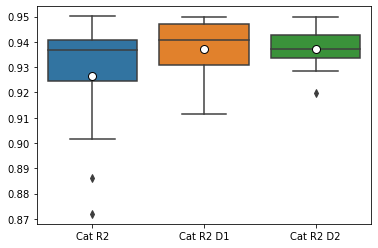

In [32]:
sns.boxplot(data=combo[['Cat R2', 'Cat R2 D1', 'Cat R2 D2']], showmeans=True,
                        meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"8"});